### Bartholomew_Luke_DA301_Assignment_Notebook <a id='top'></a>

## Predicting Future Outcomes

Welcome to my Jupyter Notebook. The following sections should be completed in order:

1. <a class="anchor" href='#1'>Files Required</a>
2. <a class="anchor" href='#2'>Library Dependencies</a>
3. <a class="anchor" href='#3'>Import & Describe The Data</a>
4. <a class="anchor" href='#4'>Data Wrangling</a>
5. <a class="anchor" href='#5'>Making Predictions with Regression</a>
6. <a class="anchor" href='#6'>Making Predictions with Clustering</a>
7. <a class="anchor" href='#7'>Analysing Customer Sentiments with Reviews</a>
10. <a class="anchor" href='#10'>Recommendations</a>

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">1. Files Required</h2></th>
        <th><a id="1"></a></th>
    </tr>
</thead>
</table>

This notebook requires the `turtle_reviews.csv`, `turtle_sales.csv` and `metadata_turtle_games.txt` files. Upload these files to the directory before you begin.

The files, this Jupyter notebook and technical report can be accessed at the [GitHub repository][id2].

[id2]:https://github.com/lukebart/Bartholomew_Luke_DA301_Assignment

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">2. Library Dependencies</h2></th>
        <th><a id="2"></a></th>
    </tr>
</thead>
</table>

The following libraries will need to be installed for this notebook to work:
- [Numpy][id3]
- [Pandas][id4]
- [Matplotlib][id6]
- [Seaborn][id7]
- [Jupyter Notebook][id8]
- [Statsmodels][id16]
- [Scikit-learn][id9]
- [Yellowbrick][id10]
- [NLTK][id11]
- [Wordcloud][id17]
- [vaderSentiment][id12]
- [TextBlob][id13]
- [Huggingface Transformers][id14]
- [Pytorch][id15]
- [TDMQ][id16]

[id3]:https://anaconda.org/conda-forge/numpy
[id4]:https://anaconda.org/conda-forge/pandas
[id5]:https://anaconda.org/trentonoliphant/datetime
[id6]:https://anaconda.org/conda-forge/matplotlib
[id7]:https://anaconda.org/conda-forge/seaborn
[id8]:https://anaconda.org/conda-forge/notebook
[id9]:https://anaconda.org/conda-forge/scikit-learn
[id16]:https://anaconda.org/anaconda/statsmodels
[id10]:https://anaconda.org/conda-forge/yellowbrick
[id11]:https://anaconda.org/conda-forge/nltk
[id17]:https://anaconda.org/conda-forge/wordcloud
[id12]:https://anaconda.org/conda-forge/vadersentiment
[id13]:https://anaconda.org/conda-forge/textblob
[id14]:https://anaconda.org/conda-forge/transformers
[id15]:https://anaconda.org/conda-forge/pytorch
[id16]:https://anaconda.org/conda-forge/tqdm


### Import Libraries

<div class="alert alert-block alert-danger">
<b>Important:</b> Run the code below before going further.
</div>

In [4]:
# Import basic data analysis libraries
import numpy as np
import pandas as pd

# Import charting libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Import stats models
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import sklearn and yellowbrick
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Import NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import Word, TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline
import torch

# Import other libraries
from tqdm.notebook import tqdm

# Note: Indicates situations that aren’t necessarily exceptions
import warnings  
warnings.filterwarnings('ignore')

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">3. Import &amp Describe The Data</h2></th>
        <th><a id="3"></a></th>
    </tr>
</thead>
</table>

Sense-check the <b>raw data</b> from the imported from the files using Pandas DataFrames. Determine (a) column names, number of rows and columns, data types and number of missing values, and (b) descriptive statistics and metadata of each DataFrame.

### 1. Import Data From .csv Files

In [3]:
# Load the .csv files as turtle_sales & turtle_reviews
turtle_sales = pd.read_csv('turtle_sales.csv')
turtle_reviews = pd.read_csv('turtle_reviews.csv')

### Functions

<b>NOTE:</b> In order to avoid repetition, I wrote a function used to describe the imported data.

In [4]:
# Function to describe data in the dataframe (mini version)
# df = DataFrame object (dataframe)
# df_sum = Column to sum (string)
def describe_data_mini(df, df_sum):
    # Check shape of dataframe
    print("Shape of DataFrame:")
    print(df.shape)
    
    # missing values
    df_na = df.isna().sum()
    print("Missing values in DataFrame:")
    print(df_na)
    
    # Check info of dataframe
    print("Info of DataFrame:")
    print(df.info())
    
    # return head of dataframe
    print("Head of DataFrame:")
    return df.head(5).style.bar(subset=[df_sum], color='#CCCCCC')

In [11]:
# Function to describe data in the dataframe
# df = DataFrame object (dataframe)
# df_name = Name of the file the DataFrame object created from (string)
# df_columns = List of columns to describe unique values (list)
# df_sum = Column to sum (string)
# df_head = Show number of rows (integer)
def describe_data(df, df_name, df_columns, df_sum, df_head):
    print(f"Shape of DataFrame {df_name}:")
    print(df.shape)
    print('\n')
    print(f"Info of DataFrame {df_name}:")
    print(df.info())
    print('\n')
    print(f"Describe DataFrame {df_name}:")
    print(df.describe())
    print('\n')
    # Determine the number of missing values
    df_na = df.isna().sum()
    print(f"Missing values in DataFrame {df_name}:")
    print(df_na)
    print('\n')
    # Check for duplicates
    df_duplicates = df[df.duplicated()]
    print(f"Duplicates in DataFrame {df_name}:")
    print(df_duplicates)
    print('\n')
    # loop df_columns
    for col_name in df_columns:
        # Show unique values by col_name
        print(f"Unique count for {col_name} of DataFrame {df_name}: ")
        print(df[col_name].unique())
        print(df[col_name].nunique())
        print('\n')
        # Show sum of column df_sum by col_name
        print(f"Sum {df_sum} by {col_name} of DataFrame {df_name} (top {df_head}): ")
        print(df.groupby(col_name).aggregate({df_sum : 'sum'}).
              sort_values(by=[df_sum], ascending=False).head(df_head))
        print('\n')
    print(f"Head of DataFrame {df_name}:")
    return df.head(5)

### 2. Describe turtle_sales

In [6]:
# show head for turtle_sales
turtle_sales.head(5)

Ranking  Product Platform    Year         Genre Publisher  NA_Sales  \
0        1      107      Wii  2006.0        Sports  Nintendo     34.02   
1        2      123      NES  1985.0      Platform  Nintendo     23.85   
2        3      195      Wii  2008.0        Racing  Nintendo     13.00   
3        4      231      Wii  2009.0        Sports  Nintendo     12.92   
4        5      249       GB  1996.0  Role-Playing  Nintendo      9.24   

   EU_Sales  Global_Sales  
0     23.80         67.85  
1      2.94         33.00  
2     10.56         29.37  
3      9.03         27.06  
4      7.29         25.72

In [9]:
# Call function to describe data in turtle_sales.csv
describe_data(turtle_sales,'turtle_sales.csv',['Platform',
                                               'Genre',
                                               'Publisher'],
                                               'Global_Sales',10)

Shape of DataFrame turtle_sales.csv:
(352, 9)


Info of DataFrame turtle_sales.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Platform      352 non-null    object 
 3   Year          350 non-null    float64
 4   Genre         352 non-null    object 
 5   Publisher     352 non-null    object 
 6   NA_Sales      352 non-null    float64
 7   EU_Sales      352 non-null    float64
 8   Global_Sales  352 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 24.9+ KB
None


Describe DataFrame turtle_sales.csv:
            Ranking      Product         Year    NA_Sales    EU_Sales  \
count    352.000000   352.000000   350.000000  352.000000  352.000000   
mean    1428.017045  3607.227273  2006.985714    2.515966    1.643778   
std     2743.

In [7]:
# unique values in Ranking column
turtle_sales['Ranking'].nunique()

352

In [8]:
# unique values in Product column
turtle_sales['Product'].nunique()

175

### Description of dataset turtle_sales.csv

- shape confirms the total rows to be 352 and 9 columns.
- info() shows Year column has float64 datatype, this will need to be changed to int64.
- describe() shows Year range is from 1982 to 2016 with average 2007, Global_Sales range from 0.01 (millions) to 67.85 (millions) with average 5.33 (millions).
- isna() and info() shows 2 missing values in the Year column.
- No duplcate rows found.
- Unique count of Platform shows 22 categories, and sum of Global_Sales by Platform shows Wii to be the best selling category.
- Unique count of Genre shows 12 categories, and sum of Global_Sales by Genre shows Shooter to be the best selling category.
- Unique count of Publisher shows 24 categories, and sum of Global_Sales by Publisher shows Nintendo to be the best selling category.
- Ranking is unique to each row (352 unique values).
- Product has duplicates (175 unique values).

<b>Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names to lower case.</li>
    <li>Find and remove/edit missing values in Year column.</li>
    <li>Change Year column to datatype int64.</li>
    <li>Update Product column name to be product_id.</li>
</ol>

### 3. Describe turtle_reviews

In [9]:
# show head for turtle_reviews
turtle_reviews.head(5)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [12]:
# Call function to describe data in turtle_reviews.csv
describe_data(turtle_reviews,'turtle_reviews.csv',['gender',
                                                   'age',
                                                   'education',
                                                   'language',
                                                   'platform'],
                                                   'loyalty_points',10)

Shape of DataFrame turtle_reviews.csv:
(2000, 11)


Info of DataFrame turtle_reviews.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


Describe DataFrame turtle_reviews.csv:
    

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [13]:
# unique values in Product column
turtle_reviews['product'].nunique()

200

### Description of dataset turtle_reviews.csv

- shape confirms the total rows to be 2000 and 11 columns.
- info() shows all columns are the corrent datatypes.
- describe() shows age range is from 17 to 72 with average 39.45, remuneration range from 12.30 (thousands) to 112.34 (thousands) with average 48.08, spending_score range 1 to 99 with average 50, loyalty_points range from 25 to 6847 with average 1578.03.
- isna() and info() shows no missing values.
- No duplcate rows found.
- Unique count of gender shows 2 categories (Male & Female), and the sum of loyalty_points by gender shows Female with the most loyalty_points.
- Unique count of education shows 5 categories and the sum of loyalty_points by education shows graduate to have the most loyalty_points.
- Unique count of language shows a single category (EN).
- Unique count of platform shows a single category (Web).
- Product has duplicates (200 unique values).
- No unique index in the dataset (e.g. customer_id).

<b>Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score.</li>
    <li>Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds.</li>
    <li>Update values in the education column to be capitalised, which will help with visualisation.</li>
    <li>Remove language column as it has no value to the analysis.</li>
    <li>Remove platform column as it has no value to the analysis.</li>
    <li>Update product column name to be product_id.</li>
    <li>Check duplicates by product_id.</li>
</ol>

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">4. Data Wrangling</h2></th>
        <th><a id="4"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

### 1. Manipulation of the turtle_sales dataset

<b>Reminder: Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names to lower case.</li>
    <li>Find and remove/edit missing values in Year column.</li>
    <li>Change Year column to datatype int64.</li>
    <li>Update Product column name to be product_id.</li>
    <li>Check for duplicates by product_id.</li>
</ol>

### (i) Change column names to lower case

Making all column names lower case will make it easier when coding.

In [14]:
turtle_sales.columns = turtle_sales.columns.str.lower()

In [15]:
turtle_sales.head()

ranking  product platform    year         genre publisher  na_sales  \
0        1      107      Wii  2006.0        Sports  Nintendo     34.02   
1        2      123      NES  1985.0      Platform  Nintendo     23.85   
2        3      195      Wii  2008.0        Racing  Nintendo     13.00   
3        4      231      Wii  2009.0        Sports  Nintendo     12.92   
4        5      249       GB  1996.0  Role-Playing  Nintendo      9.24   

   eu_sales  global_sales  
0     23.80         67.85  
1      2.94         33.00  
2     10.56         29.37  
3      9.03         27.06  
4      7.29         25.72

### (ii) Find and remove/edit missing values in Year column

In [16]:
# creating boolean series True for NaN values
boolean_series = pd.isnull(turtle_sales["year"])

# displaying data only with year = NaN
turtle_sales[boolean_series]

ranking  product platform  year    genre        publisher  na_sales  \
179      180     7141      PS2   NaN   Sports  Electronic Arts      3.49   
257     1128      948       PC   NaN  Shooter       Activision      0.48   

     eu_sales  global_sales  
179      0.21          4.29  
257      0.66          1.34

> As expected, we have 2 rows with year = NaN, rather than remove the data we can fill these rows will year = average or 2007 (as discovered earlier).

In [17]:
# fill all missing values with value 2007
turtle_sales = turtle_sales.fillna(2007)

In [18]:
# check missing values
df_na = turtle_sales.isna().sum()

# show head
df_na.head()

ranking     0
product     0
platform    0
year        0
genre       0
dtype: int64

In [19]:
# check rows that previously contained missing values
turtle_sales[(turtle_sales['ranking'] == 180) | (turtle_sales['ranking'] == 1128)].head()

ranking  product platform    year    genre        publisher  na_sales  \
179      180     7141      PS2  2007.0   Sports  Electronic Arts      3.49   
257     1128      948       PC  2007.0  Shooter       Activision      0.48   

     eu_sales  global_sales  
179      0.21          4.29  
257      0.66          1.34

> Rows were updated successfully to be the mean value of 2007.

### (iii) Change Year column to datatype int64

In [20]:
# update datatype for year from float64 to int64
turtle_sales['year'] = turtle_sales['year'].astype(np.int64)

In [21]:
# check the turtle_sales info
turtle_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ranking       352 non-null    int64  
 1   product       352 non-null    int64  
 2   platform      352 non-null    object 
 3   year          352 non-null    int64  
 4   genre         352 non-null    object 
 5   publisher     352 non-null    object 
 6   na_sales      352 non-null    float64
 7   eu_sales      352 non-null    float64
 8   global_sales  352 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 24.9+ KB


In [22]:
# check the turtle_sales head
turtle_sales.head()

ranking  product platform  year         genre publisher  na_sales  \
0        1      107      Wii  2006        Sports  Nintendo     34.02   
1        2      123      NES  1985      Platform  Nintendo     23.85   
2        3      195      Wii  2008        Racing  Nintendo     13.00   
3        4      231      Wii  2009        Sports  Nintendo     12.92   
4        5      249       GB  1996  Role-Playing  Nintendo      9.24   

   eu_sales  global_sales  
0     23.80         67.85  
1      2.94         33.00  
2     10.56         29.37  
3      9.03         27.06  
4      7.29         25.72

> Updated datatype for year column correctly.

### (iv) Update Product column name to be product_id

In [23]:
# Rename the column product to be product_id
turtle_sales.rename(columns = {'product':'product_id'}, inplace = True)

In [24]:
# check the head
turtle_sales.head()

ranking  product_id platform  year         genre publisher  na_sales  \
0        1         107      Wii  2006        Sports  Nintendo     34.02   
1        2         123      NES  1985      Platform  Nintendo     23.85   
2        3         195      Wii  2008        Racing  Nintendo     13.00   
3        4         231      Wii  2009        Sports  Nintendo     12.92   
4        5         249       GB  1996  Role-Playing  Nintendo      9.24   

   eu_sales  global_sales  
0     23.80         67.85  
1      2.94         33.00  
2     10.56         29.37  
3      9.03         27.06  
4      7.29         25.72

### (v) Check duplicates for product_id

In [25]:
# find and show the duplicates by product_id (with the duplicated values)
products = turtle_sales['product_id']
product_id_duplicates = turtle_sales[products.isin(products[products.duplicated()])].sort_values('product_id')
product_id_duplicates.head(10)

ranking  product_id platform  year     genre             publisher  \
1          2         123      NES  1985  Platform              Nintendo   
200      201         123       GB  1999  Platform              Nintendo   
155      156         254      NES  1988    Puzzle              Nintendo   
5          6         254       GB  1989    Puzzle              Nintendo   
44        45         515      PS4  2014    Action  Take-Two Interactive   
23        24         515     X360  2013    Action  Take-Two Interactive   
275     1898         515       PC  2015    Action  Take-Two Interactive   
197      198         515     XOne  2014    Action  Take-Two Interactive   
16        17         515      PS3  2013    Action  Take-Two Interactive   
17        18         518      PS2  2004    Action  Take-Two Interactive   

     na_sales  eu_sales  global_sales  
1       23.85      2.94         33.00  
200      2.79      1.07          4.16  
155      2.44      0.57          4.58  
5       19.02      1.85         24.81  
44       3.12      4.76          9.82  
23       7.90      4.35         13.43  
275      0.30      0.52          0.89  
197      2.18      1.65          4.17  
16       5.75      7.60         17.55  
17       7.73      0.33         17.06

> The duplicates by product_id appear to show that the same video game released on a different gaming system.

In [26]:
# how many unique video games by product_id?
turtle_sales['product_id'].nunique()

175

> 175 unique video game titles, published across different gaming platforms. The data can be grouped by product_id.

### (vi) Export the updated dataset to ts.csv file

In [27]:
# export turtle_sales dataframe to ts.csv file
turtle_sales.to_csv('ts.csv', index=False)

<hr>

### 2. Manipulation of the turtle_reviews dataset

<b>Reminder: Data Wrangling To-Do List:</b>
<ol type="1">
    <li>1. Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score.</li>
    <li>2. Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds.</li>
    <li>3. Update values in the education column to be capitalised, which will help with visualisation.</li>
    <li>4. Remove language & platform columns as they have no value to the analysis.</li>
    <li>5. Update product column name to be product_id.</li>
    <li>6. Check for duplicates by product_id</li>
</ol>

### (i) Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score

In [28]:
# Rename the column headers
turtle_reviews.rename(columns = {'remuneration (k£)':'remuneration', 
                                 'spending_score (1-100)':'spending_score'}, inplace = True)

In [29]:
# check the info
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


### (ii) Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds

In [30]:
# change remuneration to actual amount in thousands of pounds
turtle_reviews['remuneration'] = turtle_reviews['remuneration']*1000

In [31]:
# change remueration from float64 to int64 (remove decimal places)
turtle_reviews['remuneration'] = turtle_reviews['remuneration'].astype(np.int64)

In [32]:
# check the head
turtle_reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12300              39             210  graduate   
1    Male   23         12300              81             524  graduate   
2  Female   22         13120               6              40  graduate   
3  Female   25         13120              77             562  graduate   
4  Female   33         13940              40             366  graduate   

  language platform  product  \
0       EN      Web      453   
1       EN      Web      466   
2       EN      Web      254   
3       EN      Web      263   
4       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### (iii) Update values in the education column to be capitalised, which will help with visualisation

In [33]:
# Show the different categories for education
turtle_reviews['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [34]:
# Dictionary mapping education with new value
education_values = {'graduate' : 'Graduate',
                    'PhD' : 'PhD',
                    'postgraduate' : 'Post-Graduate',
                    'diploma' : 'Diploma',
                    'Basic' : 'Basic'}

In [35]:
# Create new season column from dictionary mapping
turtle_reviews['education'] = turtle_reviews['education'].map(education_values)

In [36]:
# Show the different categories for education
turtle_reviews['education'].value_counts()

Graduate         900
PhD              460
Post-Graduate    400
Diploma          190
Basic             50
Name: education, dtype: int64

### (iv) Remove language and platform columns as these have no value to the analysis

In [37]:
# Drop language and platform columns
turtle_reviews = turtle_reviews.drop(['language', 'platform'], axis=1)

In [38]:
# check the info
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          2000 non-null   object
 1   age             2000 non-null   int64 
 2   remuneration    2000 non-null   int64 
 3   spending_score  2000 non-null   int64 
 4   loyalty_points  2000 non-null   int64 
 5   education       2000 non-null   object
 6   product         2000 non-null   int64 
 7   review          2000 non-null   object
 8   summary         2000 non-null   object
dtypes: int64(5), object(4)
memory usage: 140.8+ KB


### (v) Update product column name to be product_id

In [39]:
# Rename the column product to be product_id
turtle_reviews.rename(columns = {'product':'product_id'}, inplace = True)

In [40]:
# check the head
turtle_reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12300              39             210  Graduate   
1    Male   23         12300              81             524  Graduate   
2  Female   22         13120               6              40  Graduate   
3  Female   25         13120              77             562  Graduate   
4  Female   33         13940              40             366  Graduate   

   product_id                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### (vi) Check duplicates by product_id (compare reviews to determine if the products are the same)

In [41]:
# find and show the duplicates by product_id (with the duplicated values)
products = turtle_reviews['product_id']
product_id_duplicates = turtle_reviews[products.isin(products[products.duplicated()])].sort_values('product_id')

# set the max column width
pd.options.display.max_colwidth = 100

# show the duplicated product_id's and review text
product_id_duplicates[['product_id', 'review']].head(10)

product_id  \
1220         107   
1602         107   
39           107   
1026         107   
831          107   
1811         107   
635          107   
438          107   
1413         107   
238          107   

                                                                                                   review  
1220                   Great addition to my game. Hopefully we'll get more of these for the new eddition.  
1602    Great doll to go with the book & animals! Can't wait to read book with the doll to the grandkids!  
39                               I gave this as a Christmas present and it seems it went over quite well.  
1026  Brutal. You have to really plan out and strategize to win. Just the first adventure alone is alr...  
831   Buying and selling hotels sounds kind of boring on the surface.  But if you went for that knee j...  
1811  If you're lucky enough to get the right letters in your hand, you'll probably have a good time. ...  
635   I really wanted to love this, I like it ok. The eggs themselves are fine.  A nice product.  Alth...  
438                                                         Easy-to-use great for anger management groups  
1413  This is a very well designed and balanced set of expansions to the original Lords Of Waterdeep b...  
238                                                                               brings very little wool

> The duplicated product_id's do not appear to match with the reviews. For example, the reviews for product_id=107 are:
> - [1602] 'Great doll to go with the book & animals! Can't wait to read book with the doll to the grandkids!'
> - [1026] 'Brutal. You have to really plan out and strategize to win.'
> - [831] 'Buying and selling hotels sounds kind of boring on the surface.'
> - [1413] 'This is a very well designed and balanced set of expansions to the original Lords Of Waterdeep...'

<div class="alert alert-block alert-info"><b>NOTE: </b>The reviews are not related to the product_id, so I am assuming that the product_id is incorrect for this dataset.</div>

### (vii) Export the updated dataset to tr.csv file

In [42]:
# export turtle_sales dataframe to tr.csv file
turtle_reviews.to_csv('tr.csv', index=False)

<hr>

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">5. Making Predictions with Regression</h2></th>
        <th><a id="5"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

### Function

This function is used to standardise a dataset so that the numerical values are between 0 and 1.

In [43]:
# Apply the maximum absolute scaling in Pandas using the .abs() and .max() methods.
def max_abs_scaling(df):
    # Copy the DataFrame.
    df_scaled = df.copy()
    if isinstance(df_scaled, pd.DataFrame):
        # Apply maximum absolute scaling.
        for column in df_scaled.columns:
            df_scaled[column] = df_scaled[column] / df_scaled[column].abs(
            ).max()
    else:
        df_scaled = df_scaled / df_scaled.abs().max()
        
    return df_scaled

### Import Data

In [44]:
# import tr.csv dataset
tr = pd.read_csv('tr.csv')

In [45]:
# check the head
tr.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12300              39             210  Graduate   
1    Male   23         12300              81             524  Graduate   
2  Female   22         13120               6              40  Graduate   
3  Female   25         13120              77             562  Graduate   
4  Female   33         13940              40             366  Graduate   

   product_id  \
0         453   
1         466   
2         254   
3         263   
4         291   

                                                                                                review  \
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...   
1  An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards a...   
2  Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyon...   
3                                    Amazing buy! Bought it as a gift for our new dm and it's perfect!   
4  As my review of GF9's previous screens these were completely unnecessary and nearly useless. Ski...   

                                                                                            summary  
0  The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...  
1                                         Another worthless Dungeon Master's screen from GaleForce9  
2                                                                   pretty, but also pretty useless  
3                                                                                        Five Stars  
4                                                                                        Money trap

We are going to use age, remuneration and spending_score to predict the value of loyalty_points.

In [46]:
# we are interested on how age, remuneration and spending_score impact on loyalty_points
# Drop unnecessary columns
tr_subset = tr.drop(['gender', 'education', 'product_id', 'review', 'summary'], axis=1)

In [47]:
# check the head
tr_subset.head()

age  remuneration  spending_score  loyalty_points
0   18         12300              39             210
1   23         12300              81             524
2   22         13120               6              40
3   25         13120              77             562
4   33         13940              40             366

In [48]:
# check the info
tr_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             2000 non-null   int64
 1   remuneration    2000 non-null   int64
 2   spending_score  2000 non-null   int64
 3   loyalty_points  2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB


### 1. Exploratory Data Analysis (EDA)

### (i) Visualise the Data: Pairplots

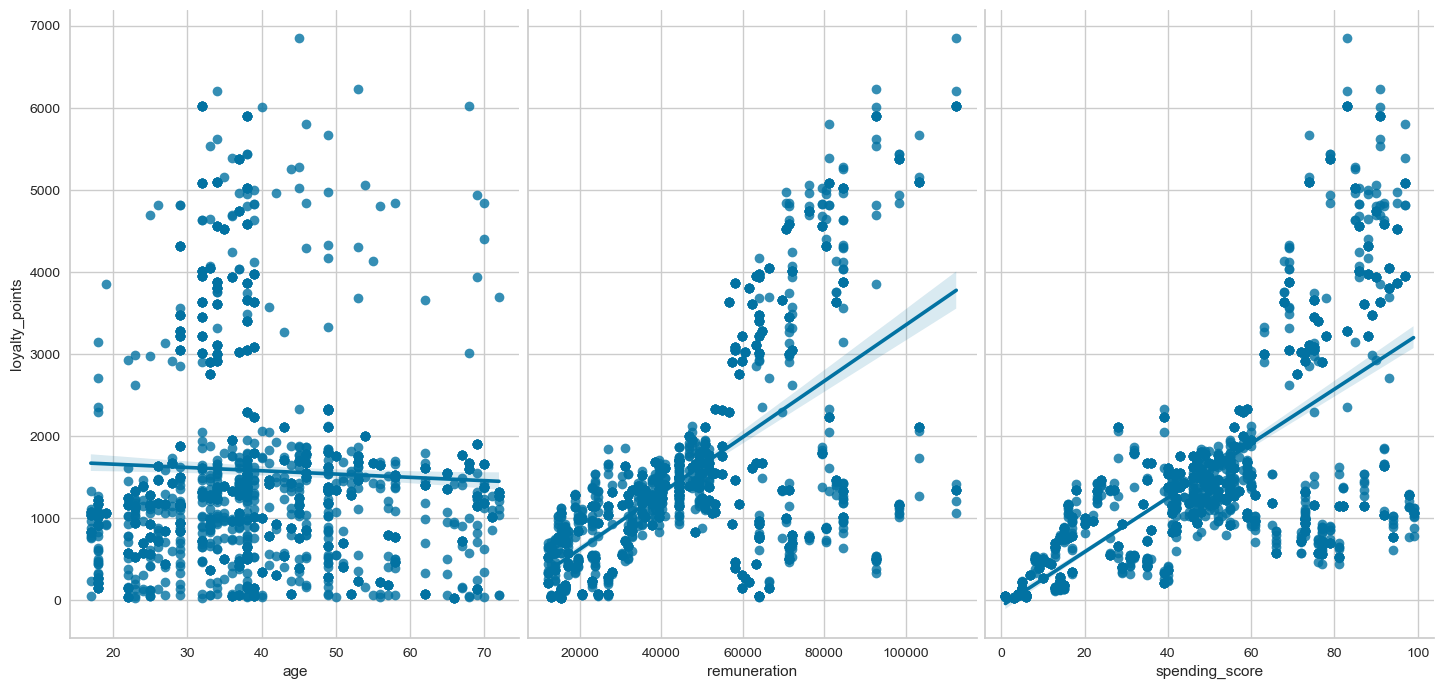

In [229]:
# visualise a pairplot with the age, remuneration and spending_score by loyalty_points
sns.pairplot(tr_subset, x_vars=['age', 'remuneration', 'spending_score'], \
             y_vars='loyalty_points', height=7, aspect=0.7, kind='reg')

# show the plot
plt.show()

In [49]:
# calculate correlations
tr_subset.corr()

age  remuneration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
remuneration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

The charts and correlation numbers above illustrates the relationship between loyalty_points (1 column) and age, remuneration and spending_score (3 columns). Based on this we can say the following:
- age has a very low negative correlation with loyalty_points (-0.042).
- remuneration has a strong positive correlation with loyalty_points (0.616).
- spending_score has a strong positive correlation with loyalty_points (0.672).

Later on we will investigate the strength and predictive power of these correlations.

### (ii) Visualise the Data: Boxplots

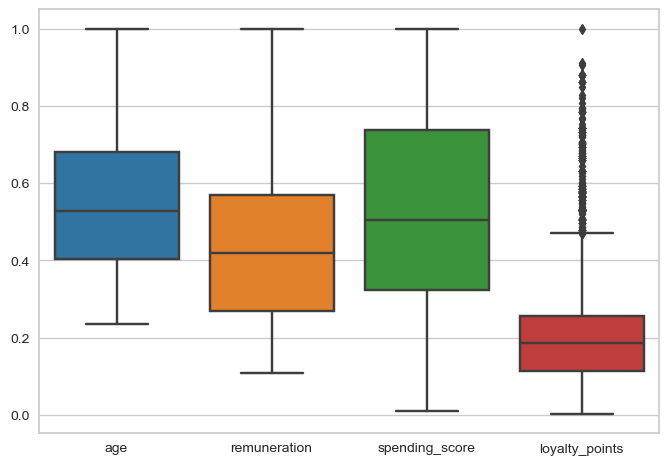

In [51]:
# visualise a boxplot for each column in dataset
# scale the data between 0 and 1
sns.boxplot(max_abs_scaling(tr_subset), palette='tab10')

# show the plot
plt.show()

The boxplots above shows:
- remuneration has extreme higher values.
- spending_score looks evenly distributed with not too many extreme values.
- loyalty_points have extreme high values outside the interquartile range (outliers).

### (iii) Visualise the Data: Histograms

Histograms will show us the distribution of the data within each column.

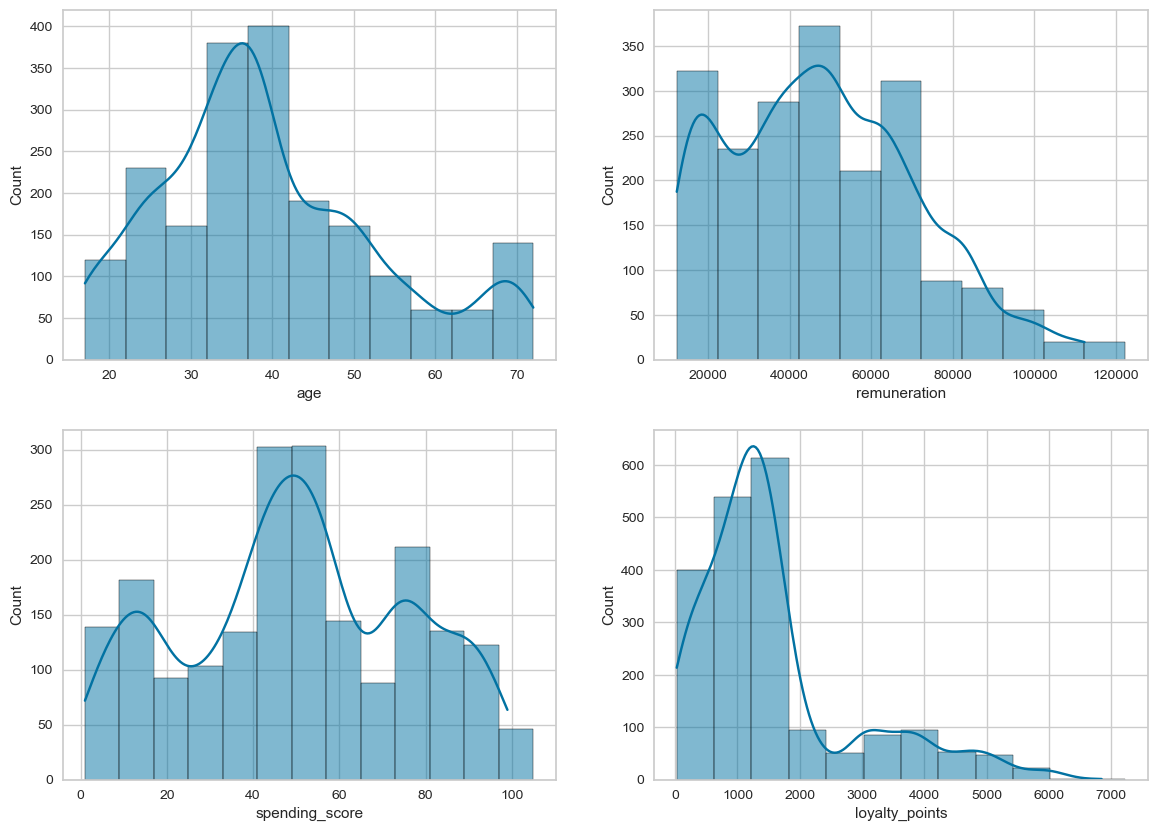

In [52]:
# visualise a histogram for each column in dataset
# setup the figure 2 x 2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# create the histograms
sns.histplot(data=tr_subset, x="age", kde=True, ax=axs[0, 0], binwidth=5)
sns.histplot(data=tr_subset, x="remuneration", kde=True, ax=axs[0, 1], binwidth=10000)
sns.histplot(data=tr_subset, x="spending_score", kde=True, ax=axs[1, 0], binwidth=8)
sns.histplot(data=tr_subset, x="loyalty_points", kde=True, ax=axs[1, 1], binwidth=600)

# show the plot
plt.show()

The histograms above show:
- age is right skewed to the lower end, but with a spike of values above 70.
- remuneration is right skewed to the lower end below 70000 with uneven distribution.
- spending_score is multimodal with 3 distinct peaks.
- loyalty_points is right skewed to the lower end below 2000.

### 2. Linear Regression

### (i) spending_score vs loyalty_points

A reminder of the metadata descriptions for <b>spending_score</b> and <b>loyalty_points</b>:
- spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.
- loyalty_points = A score based on the point value of the purchase, converting the monetary value to point value, and the point value of an action (purchase).

><b>IMPORTANT NOTE:</b> As both spending_score and loyalty_points are based on customer spend we should expect there to be a positive relationship between the two variables.

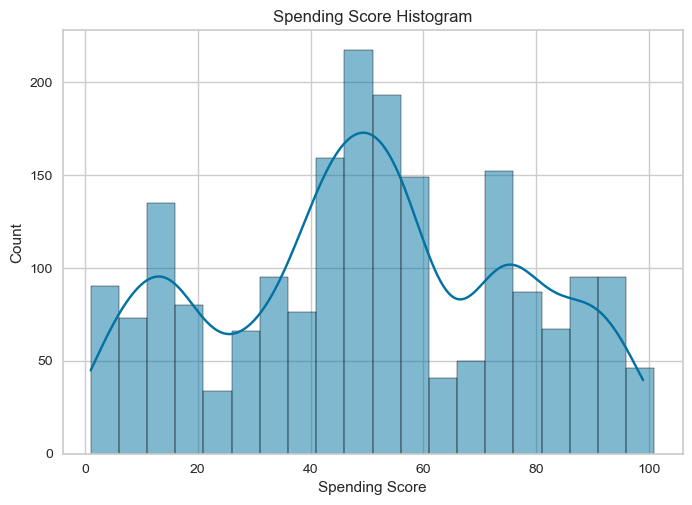

In [75]:
# Histogram of Spending Score
# check the distribution
sns.histplot(data=tr_subset, x="spending_score", kde=True, binwidth=5)

# Set the title and x_label for the graph.  
plt.title("Spending Score Histogram")
plt.xlabel("Spending Score")

# show chart
plt.show()

#### Set the dependent and independent variables and create the model

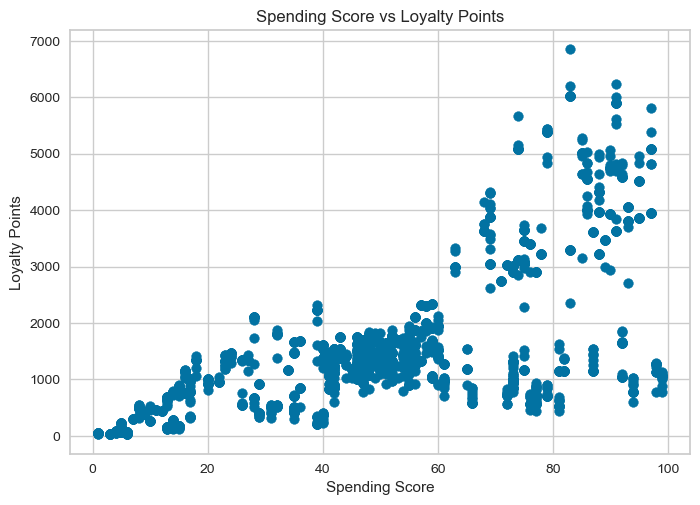

In [54]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["spending_score"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [55]:
# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        10:49:23   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The summary indicates:
> - $R^2$: 45.20% of the total variability of `y` (how many loyalty_points the customer has collected), is explained by the variability of `X` (the customer spending_score).
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 point. In this model, if the customer spending_score (`X`) changes by 1 point, then the loyalty_points collected by the customer (`y`) will change by 33.06 points. 
>  - The `P>[t]` for the `X` coefficient value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true `X` coefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (31.464 , 34.659).

#### Create the predicted y-values (loyalty_points) and plot the line of best fit

In [56]:
# Extract the estimated parameters
print("Parameters: ", test.params)

# Extract the standard errors
print("Standard errors: ", test.bse)  

# Extract the predicted values
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [57]:
# Create the linear regression model
# x coef = 33.061693
# Constant coef = -75.052663
# Create the linear equation
y_pred =  (-75.052663) + 33.061693 * X # X = spending_score

# View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

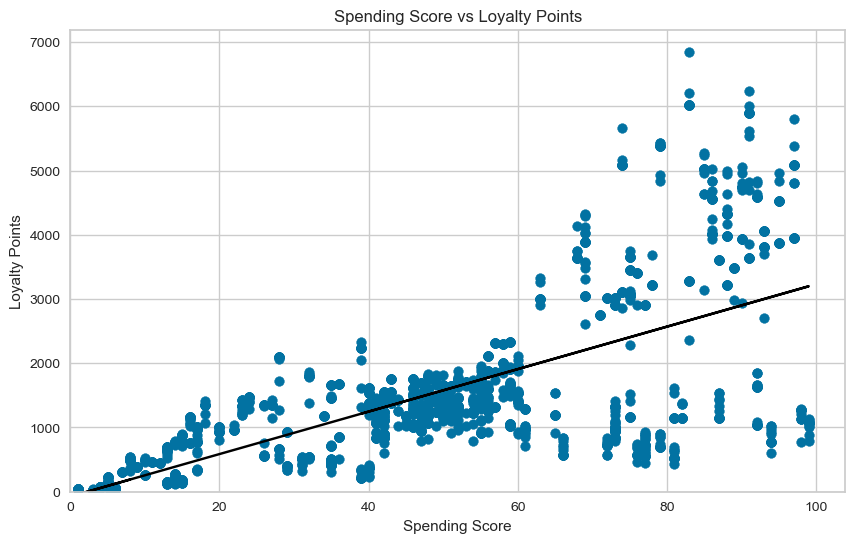

In [60]:
# Plot the data points with a scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X, y)

# Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# View the plot
plt.show()

#### Check the Residuals

This shows how far the true value of y is from the predicted value of y.

In [61]:
# Residuals are calculated
# residuals = (y-predict - y-observe)
residuals = y_pred - y

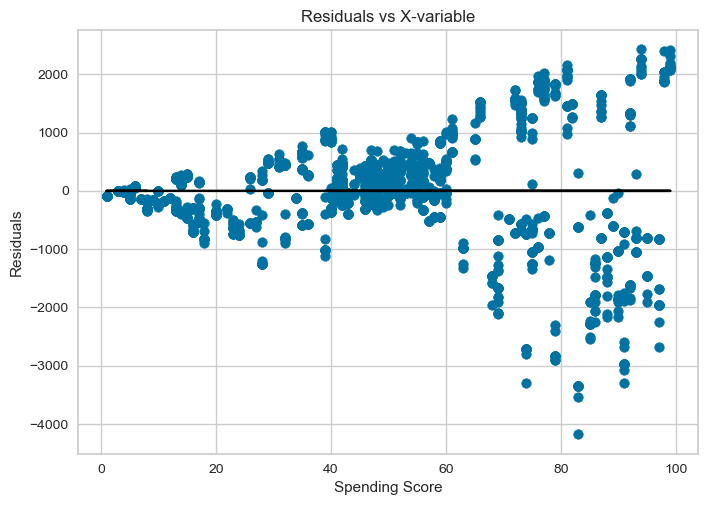

In [62]:
# Plot the residuals versus the x-values
# Ideally, there should be no pattern in this plot
plt.scatter(X, residuals)
plt.plot(X, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Spending Score")
plt.ylabel("Residuals")
plt.show()

This shows that when the spending_score is greater than 60, the predicted values for loyalty_points are further away from actual values of loyalty_points.

<b>Note:</b> We like the residuals to be close the 0 line i.e. the predicted value is not too far away from the actual value.

#### Check the Q-Q Plot

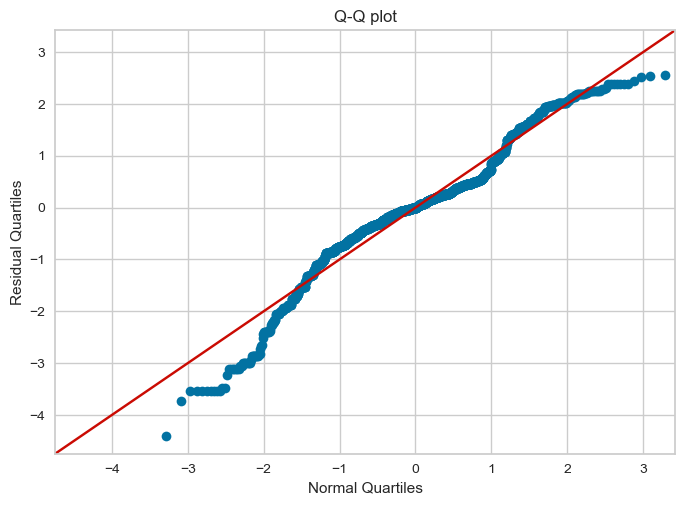

In [63]:
# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

#### As an experiment, remove customers with spending_scores greater than 60 and run the OLS test

In [64]:
tr_spending_score_lte60 = tr_subset.loc[tr_subset['spending_score'] <= 60]

In [65]:
# Dependent variable
y = tr_spending_score_lte60["loyalty_points"]

# Independent variable
X = tr_spending_score_lte60["spending_score"]

# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_spending_score_lte60).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2055.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.74e-274
Time:                        11:10:11   Log-Likelihood:                -10015.
No. Observations:                1367   AIC:                         2.003e+04
Df Residuals:                    1365   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.8290     22.483      7.020      0.000     113.725     201.933
X             25.5150      0.563     45.327      0.000      24.411      26.619
==============================================================================
Omnibus:                       29.904   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.134
Skew:                           0.335   Prob(JB):                     1.05e-07
Kurtosis:                       3.340   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> As expected, the model performs better with an $R^2$ value of 60.01% and an `X` coefficient of 25.52. We can conclude where the customer spending_score is less than or equal to 60 it will explain 60.01% of the variance in loyalty_points, and that 1 spending_score point will equal to 25.52 loyalty_points. The model will be less useful when the customer spending_score is above 60, the loyalty_points will have a higher variance and be less predictable using this metric.

### (ii) remuneration vs loyalty_points

A reminder of the metadata description for <b>remuneration</b> and <b>loyalty_points</b>:
- remuneration = Total income per customer per year in pounds, where k=1000.(I have multiplied by 1000 to give the correct value).
- loyalty_points = A score based on the point value of the purchase, converting the monetary value to point value, and the point value of an action (purchase).

><b>IMPORTANT NOTE:</b> We would anticipate that the higher customer remuneration would imply more spending power, and therefore a higher spending_score. As we know there is a strong positive correlation between spending_score and loyalty_points, so we should anticipate a strong correlation between remuneration and loyalty_points.

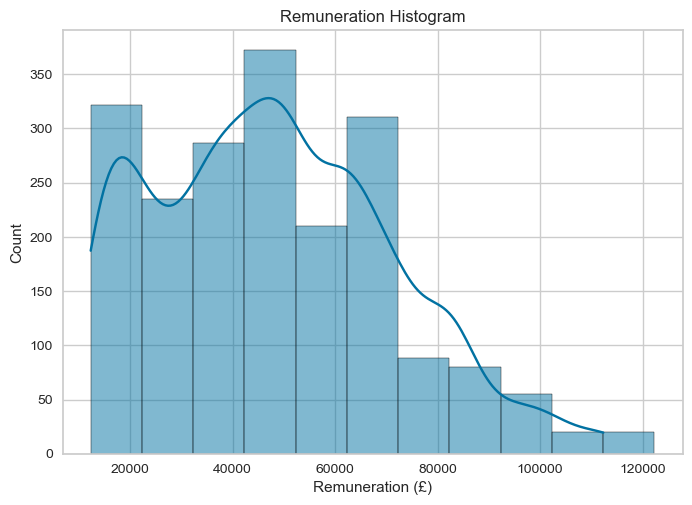

In [74]:
# Histogram of Remuneration
# check the distribution
sns.histplot(data=tr_subset, x="remuneration", kde=True, binwidth=10000)

# Set the title and x_label for the graph.  
plt.title("Remuneration Histogram")
plt.xlabel("Remuneration (£)")

# show chart
plt.show()

#### Set the dependent and independent variables and create the model

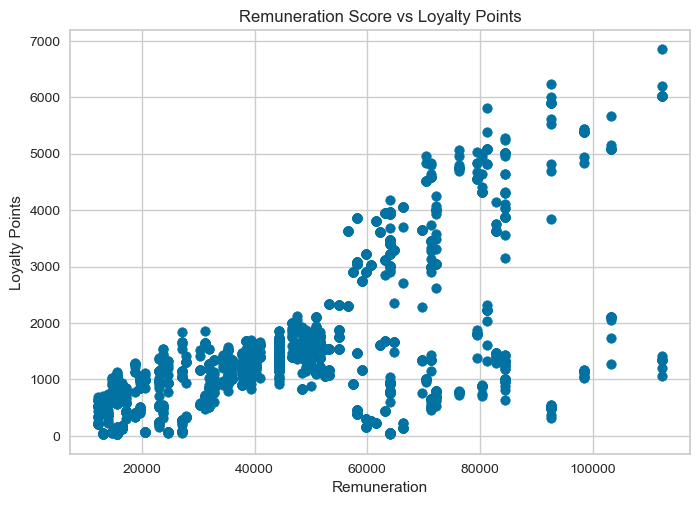

In [76]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["remuneration"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [77]:
# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        11:14:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X              0.0342      0.001     34.960      0.000       0.032       0.036
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The summary indicates:
> - $R^2$: 38% of the total variability of `y` (how many loyalty_points the customer has collected), is explained by the variability of `X` (the customer remuneration).
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 pound (£). In this model, if the customer remuneration (`X`) changes by 1000 pounds (£), then the loyalty_points collected by the customer (`y`) will increase by 34.20. 
>  - The `P>[t]` for the `X` coefficient value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true `X` coefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (0.032 , 0.036).

#### Create the predicted y-values (loyalty_points) and plot the line of best fit

In [78]:
# Extract the estimated parameters
print("Parameters: ", test.params)

# Extract the standard errors
print("Standard errors: ", test.bse)  

# Extract the predicted values
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
X             0.034188
dtype: float64
Standard errors:  Intercept    52.170717
X             0.000978
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [79]:
# Create the linear regression model
# x coef = 0.034188
# Constant coef = -65.686513
# Create the linear equation
y_pred =  (-65.686513) + 0.034188 * X # X = remuneration

# View the output
y_pred

0        354.825887
1        354.825887
2        382.860047
3        382.860047
4        410.894207
           ...     
1995    2821.831967
1996    3102.173567
1997    3102.173567
1998    3298.412687
1999    3102.173567
Name: remuneration, Length: 2000, dtype: float64

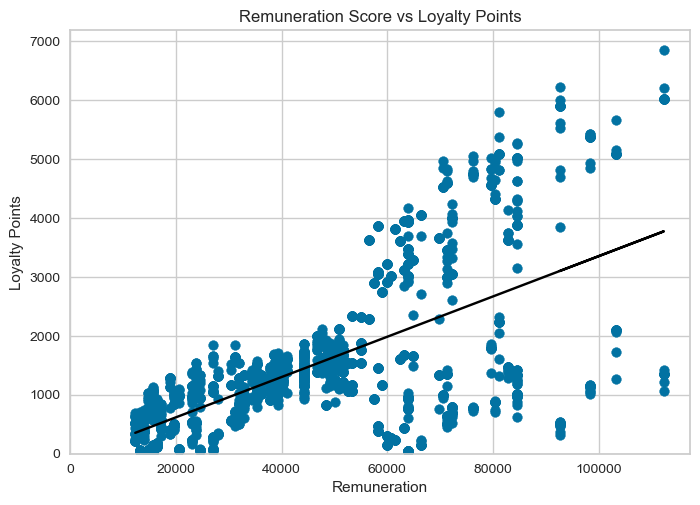

In [80]:
# Plot the data points with a scatterplot
plt.scatter(X, y)

# Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# View the plot
plt.show()

#### Check the Residuals

This shows how far the true value of y is from the predicted value of y.

In [81]:
# Residuals are calculated
# residuals = (y-predict - y-observe)
residuals = y_pred - y

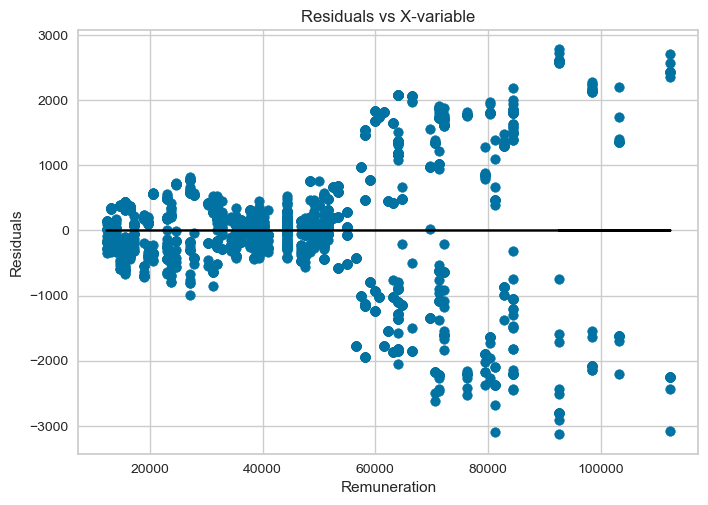

In [82]:
# Plot the residuals versus the x-values
# Ideally, there should be no pattern in this plot
plt.scatter(X, residuals)
plt.plot(X, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.show()

This shows that when the remuneration is greater than 55000, the predicted values for loyalty_points are further away from actual values of loyalty_points.

<b>Note:</b> We like the residuals to be close the 0 line i.e. the predicted value is not too far away from the actual value.

#### As an experiment, remove customers with remuneration greater than 55000 & less than 2500 loyalty_points and run the OLS test

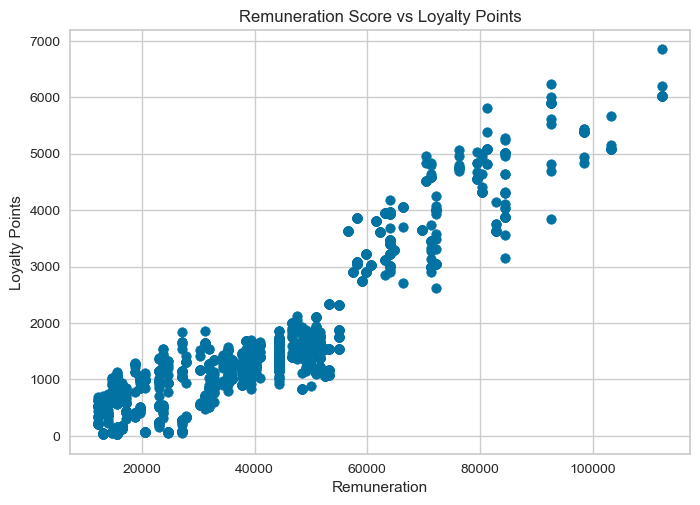

In [83]:
#tr_remuneration_lte55000 = tr_subset.loc[tr_subset['remuneration'] <= 55000]
tr_subset_remuneration = tr_subset.copy()
tr_drop = tr_subset_remuneration[(tr_subset_remuneration['remuneration'] >= 55000) \
                                 & (tr_subset_remuneration['loyalty_points'] <= 2500)].index

tr_subset_remuneration.drop(tr_drop, inplace=True)

# Check for linearity
plt.scatter(tr_subset_remuneration['remuneration'],tr_subset_remuneration['loyalty_points'])

# Set the title and legends for the graph.  
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [84]:
tr_subset_remuneration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 0 to 1997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1640 non-null   int64
 1   remuneration    1640 non-null   int64
 2   spending_score  1640 non-null   int64
 3   loyalty_points  1640 non-null   int64
dtypes: int64(4)
memory usage: 64.1 KB


In [85]:
# Dependent variable
y = tr_subset_remuneration["loyalty_points"]

# Independent variable
X = tr_subset_remuneration["remuneration"]

# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset_remuneration).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8289.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:15:15   Log-Likelihood:                -12677.
No. Observations:                1640   AIC:                         2.536e+04
Df Residuals:                    1638   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -808.0591     30.824    -26.215      0.000    -868.519    -747.600
X              0.0593      0.001     91.043      0.000       0.058       0.061
==============================================================================
Omnibus:                       26.630   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.492
Skew:                           0.253   Prob(JB):                     4.80e-06
Kurtosis:                       2.681   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Removing customers with remuneration greater than 55000 & less than 2500 loyalty_points show a strong correlation with $R^2$ = 83.5%. In this model, if the customer remuneration (`X`) changes by 1000 pounds (£), then the loyalty_points collected by the customer (`y`) will increase by 59.30. 

### (iii) age vs loyalty_points

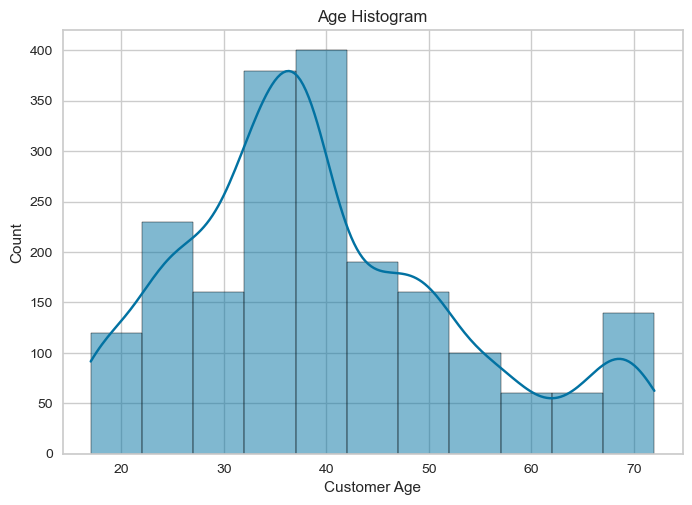

In [90]:
# Histogram of Age
# check the distribution
sns.histplot(data=tr_subset, x="age", kde=True, binwidth=5)

# Set the title and x_label for the graph.  
plt.title("Age Histogram")
plt.xlabel("Customer Age")

# show chart
plt.show()

#### Set the dependent and independent variables and create the model

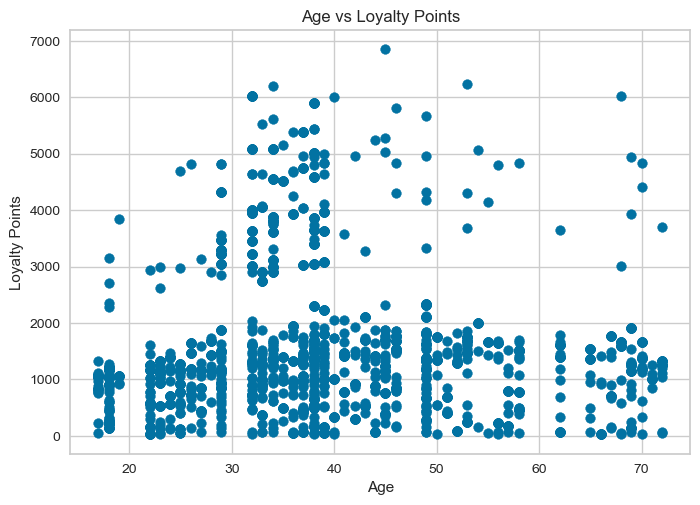

In [91]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["age"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

# show the scatterplot
plt.show()

In [93]:
# OLS model and summary

# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 20 Jul 2023   Prob (F-statistic):             0.0577
Time:                        11:22:58   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The OLS summary indicates:
> - `P>[t]` for the `X` coefficient value of 0.058 indicates that this is not significant.
> -  $R^2$ is less than 1%.

Clearly no correlation between age and loyalty_points. This model is not useful in predicting the customer loyalty_points.

### 2. Multiple Linear Regression Model (MLR)

In this section, a multiple linear regression model using age, spending_score and remuneration will be used to predict values for loyalty_points.

In [95]:
# Create new dataframe with the x-variables only
x_vars = pd.DataFrame(tr, columns=['age', 'remuneration', 'spending_score'])

x_vars.head()

age  remuneration  spending_score
0   18         12300              39
1   23         12300              81
2   22         13120               6
3   25         13120              77
4   33         13940              40

### (i) Check the Viability of the Model

### Check correlations of X variables

In [109]:
# calculate correlations
x_vars.corr()

age  remuneration  spending_score
age             1.000000     -0.005708       -0.224334
remuneration   -0.005708      1.000000        0.005612
spending_score -0.224334      0.005612        1.000000

> No strong correlations between the X variables.

### Check multicollinearity of X variables (age, spending_score and remuneration)

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_vars.values, i) for i in range(x_vars.shape[1])]
vif["x_vars"] = x_vars.columns
vif.round(1)

> As the VIF is between 3.3 and 4.3 for all X variables, it can be concluded there is moderate correlation between the X variables. As the VIF values are below 5 we can continue to use all the variables in the multiple linear regression model.

### Create the model

In [100]:
# Define the independent variables
X = tr[['age', 'remuneration', 'spending_score']]

# Define the dependent variable
y = tr['loyalty_points']

In [101]:
# Create the model
mlr = linear_model.LinearRegression()

# Fit the multiple linear regression model
mlr.fit(X,y)   

LinearRegression()

In [102]:
# Call the predictions for X (array)
mlr.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

### Print the R-squared, intercept and coefficients

In [103]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))

print("Adjusted R-squared: ", 1 - (1-mlr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8399114912748796
Adjusted R-squared:  0.8396708772838097
Intercept:  -2203.059751307922
Coefficients:


[('age', 11.060658711843358),
 ('remuneration', 0.0340083854926029),
 ('spending_score', 34.18319657763368)]

> Adjusted $R^2$ = 0.8397, which means that 84% of the variance in the data can be explained by this model. This is a high value, so this model can be used to make predictions.
> - For every increase of 1 in the 'age' variable, there will be an increase of 11.06 in 'loyalty_points'.
> - For every increase of 1000 in the 'remuneration' variable, there will be an increase of 34.00 in 'loyalty_points'.
> - For every increase of 1 in the 'spending_score' variable, there will be an increase of 34.18 in 'loyalty_points'.

The basic thesis for the model would be that an increase in any of the `age`, `remuneration` or `spending_score` variables will lead to an increase in `loyalty_points`.

### (ii) Train the MLR Model

### Implement train_test_split

In [104]:
# Split the data in 'train' (70%) and 'test' (30%) sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split \
                                   (X, y, test_size=0.3, random_state=1)

In [105]:
X_train.shape, Y_train.shape

((1400, 3), (1400,))

### Check the accuracy of the model 

In [106]:
# Training the model using the 'statsmodel' OLS library
# Fit the model with the added constant
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2555.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:29:56   Log-Likelihood:                -10716.
No. Observations:                1400   AIC:                         2.144e+04
Df Residuals:                    1396   BIC:                         2.146e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2268.7469     62.611    -36.

> Adjusted $R^2$ = 0.846, which means that 84.6% of the variance in the data can be explained by this model. This is a high value, so this model can be used to make predictions.
> `P>[t]` values are all less than 0.05 so all `x` variables are significant in explaining the variance of `y`.
> - For every increase of 1 in the 'age' variable, there will be an increase of 10.84 in 'loyalty_points'.
> - For every increase of 1000 in the 'remuneration' variable, there will be an increase of 34.90 in 'loyalty_points'.
> - For every increase of 1 in the 'spending_score' variable, there will be an increase of 34.69 in 'loyalty_points'.

### Make predictions for the training data

In [116]:
# fit the model with the training data
mlr_model = LinearRegression().fit(X_train, Y_train)

# make predictions
Y_predictions = mlr_model.predict(X_train)

# view predictions
Y_predictions

array([2212.54414898, 1385.72151369, 1529.27467921, ..., 1336.14485109,
       1736.39256289, 1152.61423225])

In [117]:
# Call the mean_absolute_error function
print('Mean Absolute Error:', round(mean_absolute_error(Y_predictions, Y_train)))

Mean Absolute Error: 394


The average difference between the measured value of `y` and the true value of `y` is 394 `loyalty_points`.

In [118]:
# combine the predictions with the actual training data
predictions_df = pd.DataFrame({'age' : X_train['age'],
                              'remuneration' : X_train['remuneration'],
                              'spending_score' : X_train['spending_score'],
                              'loyalty_points' : Y_train,
                              'predictions' : Y_predictions})

predictions_df['predictions'] = round(predictions_df['predictions'])
predictions_df['predictions'] = predictions_df['predictions'].astype(np.int64)

predictions_df

age  remuneration  spending_score  loyalty_points  predictions
1194   45         98400              16            1156         2213
45     26         31980              65            1187         1386
1477   38         44280              53            1641         1529
1293   38         49200              40            1376         1250
1736   42         22960              32             531           99
...   ...           ...             ...             ...          ...
1791   34         27060              92            1658         2237
1096   45         49200              47            1698         1569
1932   27         40180              55            1292         1336
235    23         27060              81            1152         1736
1061   18         37720              55             909         1153

[1400 rows x 5 columns]

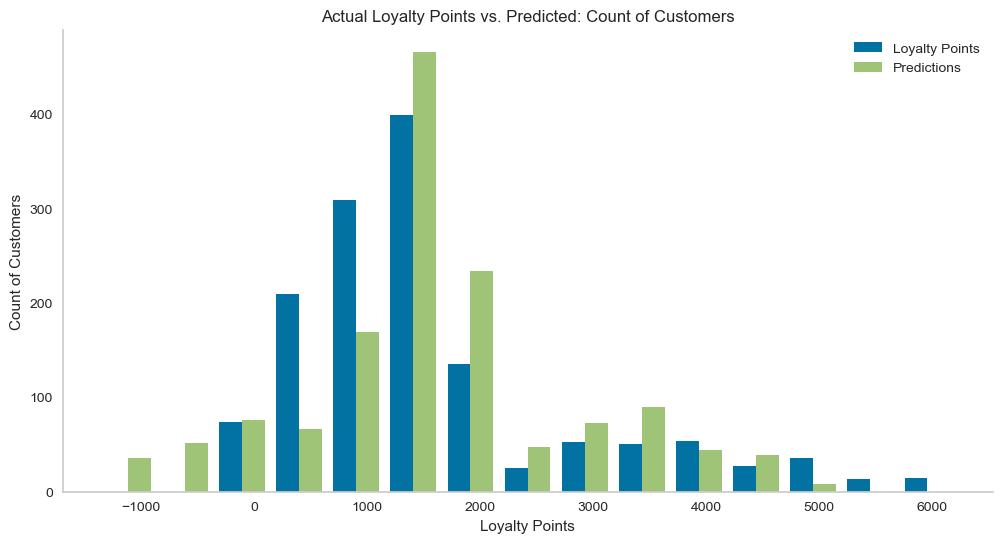

In [119]:
# histogram of loyalty_points vs predictions
fig, ax = plt.subplots(figsize=(12, 6))

# plot the chart
x = predictions_df['loyalty_points']
y = predictions_df['predictions']
plt.hist([x, y], bins=15)

# setup labels, spines, title and legend
sns.despine(top=True, right=True)
ax.grid(False)
ax.set_xlabel(r'Loyalty Points', size=11)
ax.set_ylabel(r'Count of Customers', size=11)
plt.title('Actual Loyalty Points vs. Predicted: Count of Customers', size=12)
plt.legend(['Loyalty Points', 'Predictions'])

# show chart
plt.show()

<b>Evaluate the model:</b>

- Negative predictions are going to be wrong (loyalty points cannot be negative).
- Predictions below 1000 loyalty points appear to poor.
- No predictions between 5500 and 6500.

### Make predictions based on invented data

This can be useful for Turtle Games for making predictions when the value of `loyalty_points` is unknown.

In [121]:
# initialize data of lists
data = {'age': [28, 32, 70, 45, 60],
        'remuneration': [50000, 40000, 27000, 80000, 65000],
        'spending_score': [30, 30, 10, 80, 20]}
  
# Create pandas DataFrame
df = pd.DataFrame(data)

# make the predictions and store in a dataframe
predictions_df = pd.DataFrame(mlr_model.predict(df))

# format the dataframe
predictions_df.rename(columns = {0:'loyalty_points'}, inplace = True)
predictions_df['loyalty_points'] = round(predictions_df['loyalty_points'])
predictions_df['loyalty_points'] = predictions_df['loyalty_points'].astype(np.int64)

predictions_df

loyalty_points
0             823
1             517
2            -219
3            3790
4            1347

In [122]:
# concat df and predictions_df
pd.concat([df, predictions_df], axis=1)

age  remuneration  spending_score  loyalty_points
0   28         50000              30             823
1   32         40000              30             517
2   70         27000              10            -219
3   45         80000              80            3790
4   60         65000              20            1347

In [123]:
# Create a values for X variables
new_age = 60
new_remuneration = 50000
new_spending_score = 80

# Print the predicted value of y (loyalty_points)
print ("Predicted Value for loyalty_points: \n", mlr_model.predict([[new_age, new_remuneration, new_spending_score]]))

Predicted Value for loyalty_points: 
 [2904.40534708]


> The model may exaggerate predictions when values of at least 2 of the `x` variables are far away from the mean. Predictions of negative `loyalty_points` is a clear error in the model and may occur when `x` variables all on the low end of the average values.

### (iv) Making Predictions for Y using the Blind X_test Data

The model has not been trained on the X_test data, so the results should provide a more accurate description of the model performance.

In [125]:
# make predictions
Y_predictions = mlr_model.predict(X_test)

# view predictions shape
Y_predictions.shape

(600,)

In [126]:
# combine the predictions with the actual test data
predictions_df = pd.DataFrame({'age' : X_test['age'],
                              'remuneration' : X_test['remuneration'],
                              'spending_score' : X_test['spending_score'],
                              'loyalty_points' : Y_test,
                              'predictions' : Y_predictions})

predictions_df['predictions'] = round(predictions_df['predictions'])
predictions_df['predictions'] = predictions_df['predictions'].astype(np.int64)

predictions_df

age  remuneration  spending_score  loyalty_points  predictions
674    58         44280              47            1504         1538
1699   22         92660               8             377         1485
1282   69         44280              41            1152         1449
1315   18         53300              50            1167         1524
1210   69         15580              14             138         -491
...   ...           ...             ...             ...          ...
1382   44         80360              15             881         1537
1371   32         71340              75            3455         3173
854    49         35260              45            1177         1056
995    37         98400              79            5377         4312
1497   29         63140              74            2855         2819

[600 rows x 5 columns]

> There are observations similar to the training data set. Some of the predictions appear to be far away from the observed values.

In [127]:
# Call the mean_absolute_error function
print('MAE:', round(mean_absolute_error(Y_predictions, Y_test)))

# Call the mean_squared_error function
# print('MSE:', round(mean_squared_error(Y_predictions, Y_test)))

# Call the square root of the mean_absolute_error function
print('RMSE:', round(np.sqrt(mean_squared_error(Y_predictions, Y_test))))

MAE: 396
RMSE: 522


> At 396, MAE is higher than the training model. RMSE is larger than MAE which means that there are likely to be many large errors in the predictions which could cause the model to overestimate or overestimate the predictions.

In [128]:
# Print the R-squared value
round(mlr_model.score(X_test, Y_test)*100,2)

82.27

> 82.27% of the variance in `loyalty_points` can be explained by this model, a slight decrease in comparison to the training model.

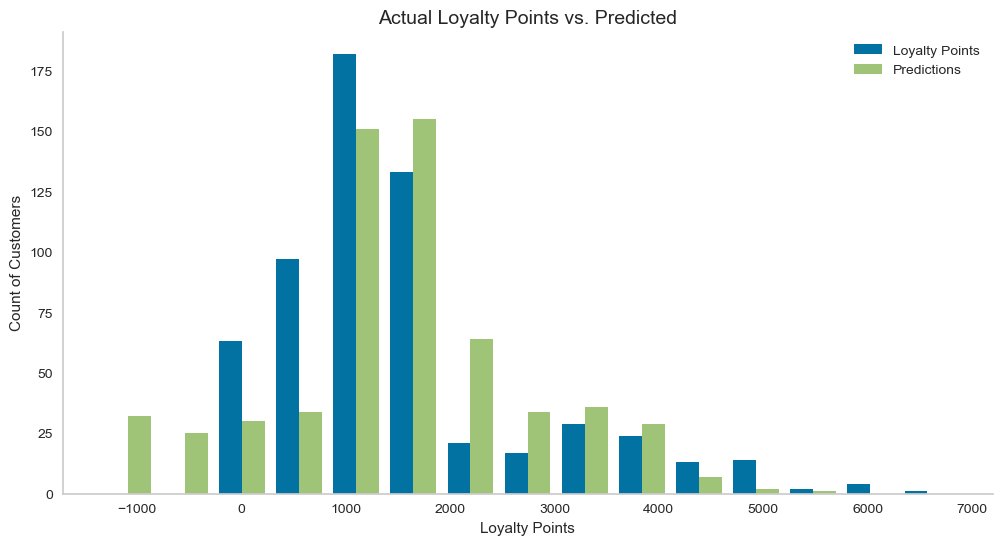

In [139]:
# histogram of loyalty_points vs predictions
fig, ax = plt.subplots(figsize=(12, 6))

# plot the chart
x = predictions_df['loyalty_points']
y = predictions_df['predictions']
plt.hist([x, y], bins=15)

# setup labels, spines, title and legend
sns.despine(top=True, right=True)
ax.grid(False)
ax.set_xlabel(r'Loyalty Points', size=11)
ax.set_ylabel(r'Count of Customers', size=11)
plt.title('Actual Loyalty Points vs. Predicted', size=14)
plt.legend(['Loyalty Points', 'Predictions'])

# show chart
plt.show()

# export chart
fig.savefig('loyalty-points-MLR-predictions.png', dpi=300, bbox_inches='tight')

In [150]:
# describe the predictions_df
predictions_df[['loyalty_points', 'predictions']].describe()

loyalty_points  predictions
count      600.000000   600.000000
mean      1535.373333  1522.436667
std       1240.830046  1209.099242
min         31.000000 -1364.000000
25%        772.000000  1051.000000
50%       1275.000000  1449.000000
75%       1703.500000  2065.500000
max       6847.000000  5274.000000

<b>Evaluate the model:</b>
- The model predicts negative loyalty points which is not possible.
- The model does not perform well when loyalty points are below 1000.
- The model performs well when loyalty_points are close to the mean and below around 4500.
- The model has no predictions above 5500. 

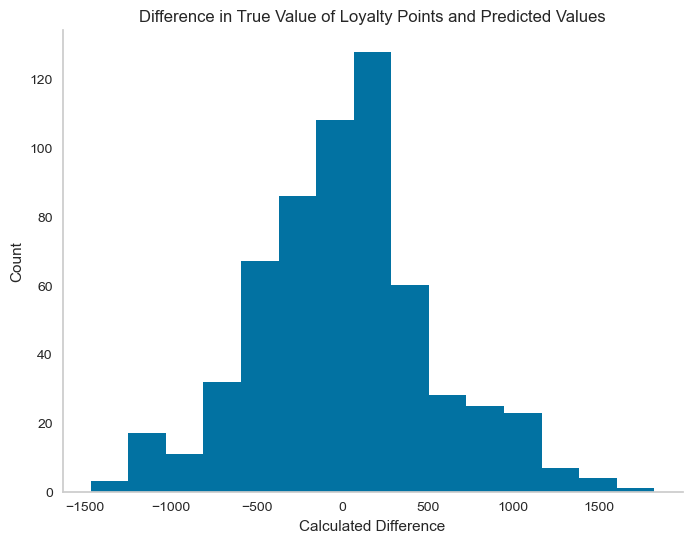

In [148]:
# histogram to show the errors in predictions
fig, ax = plt.subplots(figsize=(8, 6))

# plot the chart
plt.hist(predictions_df['loyalty_points'] - predictions_df['predictions'], bins=15)

# setup labels, spines, title and legend
sns.despine(top=True, right=True)
ax.grid(False)
ax.set_xlabel(r'Calculated Difference', size=11)
ax.set_ylabel(r'Count', size=11)
plt.title('Difference in True Value of Loyalty Points and Predicted Values', size=12)

# show the chart
plt.show()

The majority of the predications are within a 500 point accuracy to the actual true values of loyalty points.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">6. Making Predictions with Clustering</h2></th>
        <th><a id="6"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

We want better understand the usefulness of remuneration and spending_score in providing data for analysis. Firstly, we will create a scatterplot and check for any relationships between the two variables (remuneration and spending_score) and any other obvious problems with the data. Using k-means clustering to identify the optimal number of clusters and visualse the data based on these clusters. 

### Metadata Descriptions

A reminder of the metadata description for <b>remuneration</b> and <b>spending_score</b>:
- remuneration = Total income per customer per year in pounds, where k=1000.(I have multiplied by 1000 to give the correct value).
- spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.

### Import Data

In [151]:
# import tr.csv dataset
tr = pd.read_csv('tr.csv')

In [351]:
# check the head
tr.iloc[:, 0:8].head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12300              39             210  Graduate   
1    Male   23         12300              81             524  Graduate   
2  Female   22         13120               6              40  Graduate   
3  Female   25         13120              77             562  Graduate   
4  Female   33         13940              40             366  Graduate   

   product_id  \
0         453   
1         466   
2         254   
3         263   
4         291   

                                                                                                review  
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...  
1  An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards a...  
2  Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyon...  
3                                    Amazing buy! Bought it as a gift for our new dm and it's perfect!  
4  As my review of GF9's previous screens these were completely unnecessary and nearly useless. Ski...

In [153]:
# we are interested in relationships between remuneration and spending_score
# Drop unnecessary columns
tr_clustering = tr.drop(['gender', 'age', 'loyalty_points', 'education',
                          'product_id', 'review', 'summary'], axis=1)

In [154]:
# check the head
tr_clustering.head()

remuneration  spending_score
0         12300              39
1         12300              81
2         13120               6
3         13120              77
4         13940              40

### 1. Exploratory Data Analysis

In [161]:
# desribe the dataframe
tr_clustering.describe()

remuneration  spending_score
count    2000.00000     2000.000000
mean    48079.06000       50.000000
std     23123.98445       26.094702
min     12300.00000        1.000000
25%     30340.00000       32.000000
50%     47150.00000       50.000000
75%     63960.00000       73.000000
max    112340.00000       99.000000

### (i) Visualise the Data: Boxplots

k-means is <b>sensitive to outliers</b>. We can check for outliers using boxplots.

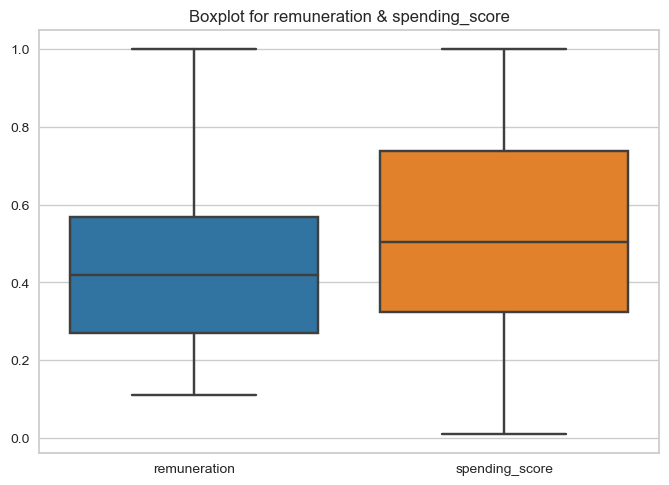

In [159]:
# visualise a boxplot for remuneration and spending_score and columns
sns.boxplot(max_abs_scaling(tr_clustering), palette='tab10')

# display the title
plt.title("Boxplot for remuneration & spending_score")

# show the plot
plt.show()

No outliers visible in the boxplots.

### (ii) Visualise the Data: Scatterplot

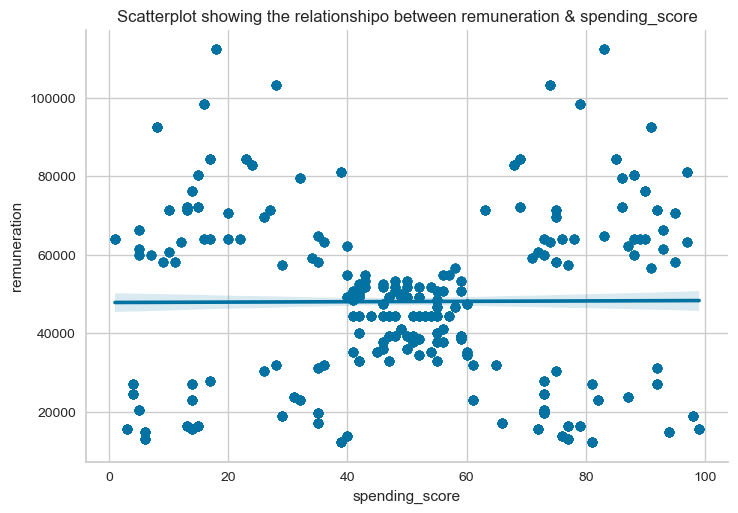

In [160]:
# visualise a pairplot with the remuneration and spending_score
sns.pairplot(tr_clustering, x_vars='spending_score', \
             y_vars='remuneration', height=5, aspect=1.5, kind='reg')

# display the title
plt.title("Scatterplot showing the relationshipo between remuneration & spending_score")

# show the plot
plt.show()

Possibly see 5 different clusters:
- Bottom left: low spending_score, low remuneration
- Bottom right: high spending_score, low remuneration
- Center: medium spending_score, medium remuneration
- Top left: low spending_score, high remuneration
- Top Right: high spending_score, high remuneration

In [162]:
# calculate correlations
tr_clustering.corr()

remuneration  spending_score
remuneration        1.000000        0.005612
spending_score      0.005612        1.000000

No linear correlation between remuneration and spending_score.

### 2. Determine the Number of Clusters

### Standardise the Data Using StandardScaler

In [163]:
# setup constant to hold the standardised model data
scaler = StandardScaler()

# fit the model with the data in the tr_clustering dataframe
scaler.fit(tr_clustering)

# standardise the data in the model
tr_scaled_data = scaler.transform(tr_clustering)

In [164]:
# show the standardised data
tr_scaled_data

array([[-1.54765751, -0.42164693],
       [-1.54765751,  1.18827772],
       [-1.51218762, -1.68658773],
       ...,
       [ 1.92839126,  1.57159312],
       [ 2.17668045, -1.30327234],
       [ 1.92839126, -1.60992466]])

### Use The Elbow Method: KElbowVisualizer

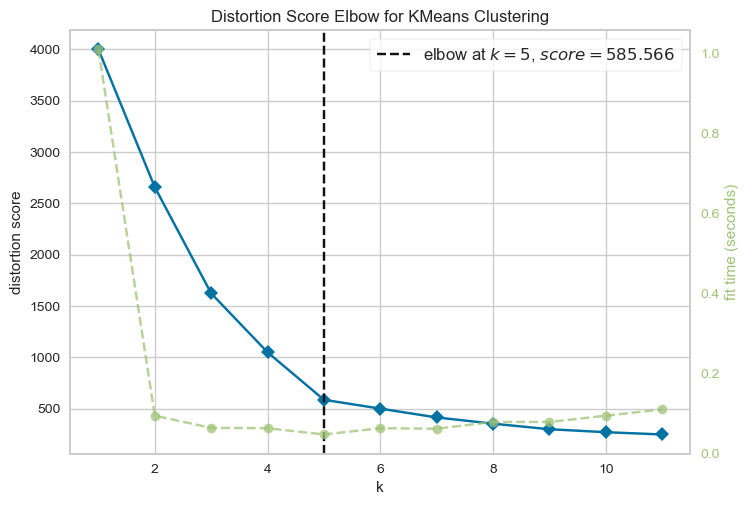

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
# Use KElbowVisualizer to calculate the Elbow
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(tr_scaled_data)

# show the elbow chart
visualizer.show()

KElbowVisualizer returns a recommended k value of 5.

### The Elbow Method: Classic Method

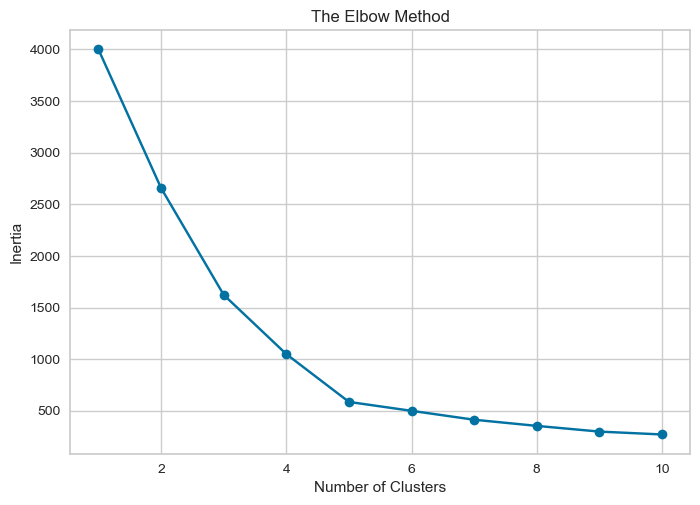

In [166]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tr_scaled_data)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11), ss, marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# show the plot
plt.show()

The elbow line is exactly the same, we can estimate the optimal number of clusters will be 5 (we are interested in the number of clusters where the inertia value reduces sharply).

### The Silhouette Method

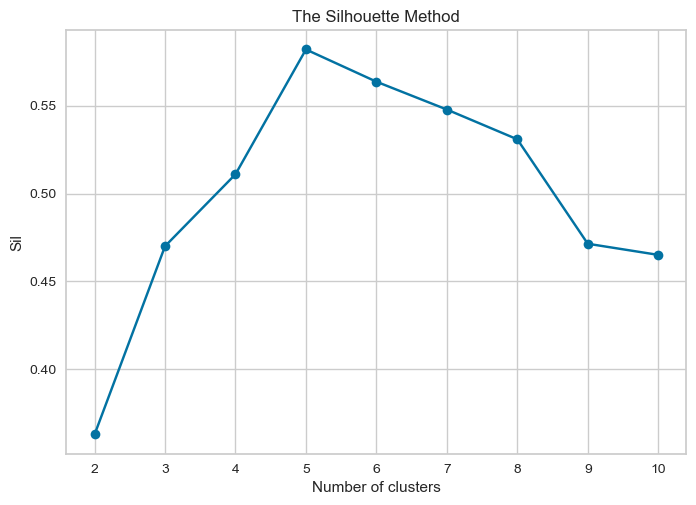

In [167]:
# Find the range of clusters to be used using silhouette method.
sil = []
k_max = 10

for k in range(2, k_max+1):
    kmeans_s = KMeans(n_clusters=k).fit(tr_scaled_data)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(tr_scaled_data, labels, metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, k_max+1), sil, marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# show the plot
plt.show()

We are interested in the number of clusters where the Sil value peaks, in this case the optimal number of clusters will be assumed to be 5. This is the same as the results from the elbow method which add confidence to the k value.

### Test for Different Number of Clusters (k)

### Function

In [168]:
def k_means_n(df, k_value):
    
    # Use k_value to fit the model
    kmeans = KMeans(n_clusters=k_value, max_iter=300, init='k-means++', random_state=42).fit(df)
    
    # Assign the kmeans.labels_ to the new cluster column in tr_clustering dataframe
    tr_clustering['cluster'] = kmeans.labels_
    
    # Plot the predicted clusters
    sns.scatterplot(data=tr_clustering, x='spending_score' , y ='remuneration', \
                    hue='cluster', s=120, palette='tab10')
    sns.rugplot(data=tr_clustering, x='spending_score', y='remuneration', hue='cluster', \
                palette='tab10', height=0.03)


### k = 4

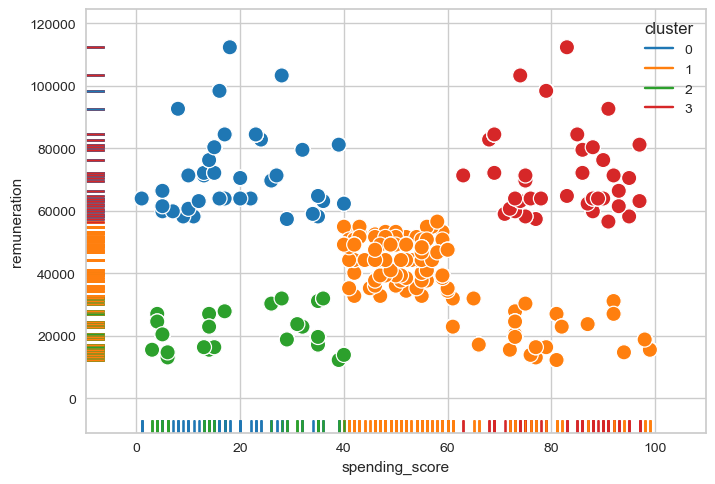

In [169]:
# 4 clusters (1 below optimal k value)
k_means_n(tr_scaled_data, 4)

The grouping for cluster 1 is spread over a large area, in comparison the other 3 clusters, which may not be ideal.

### k = 5

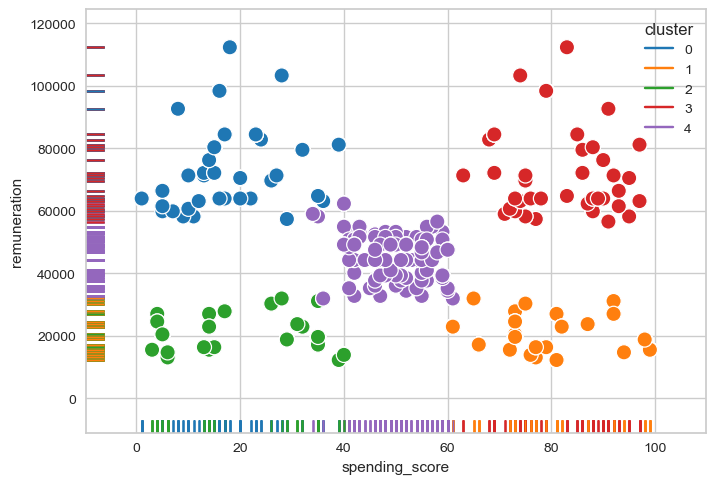

In [170]:
# 5 clusters (optimal k value)
k_means_n(tr_scaled_data, 5)

The clusters for k=5 appear to be more natural.

### k = 6

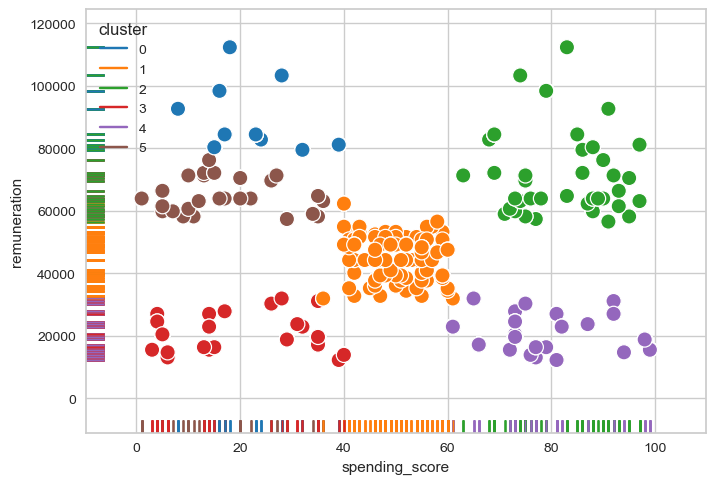

In [171]:
# 6 clusters (1 above optimal k value)
k_means_n(tr_scaled_data, 6)

It doesn't make sense to split the top left plots into cluster 5 and cluster 0.

### Model Selection

Based on the scatterplots above, k=5 appears to be the most natural fit for our model. There is more confidence in this decision because of the Elbow and Silhouette scores which are also k=5.

### 3. Fit the Model for 5 Clusters (k=5)

In [172]:
# Use five clusters to fit the model
kmeans = KMeans(n_clusters=5, max_iter=300, init='k-means++', random_state=42).fit(tr_scaled_data)

# Assign the kmeans.labels_ to the new cluster column in tr_clustering dataframe
tr_clustering['cluster'] = kmeans.labels_

In [173]:
# check the head to see if the cluster column is added
tr_clustering.head()

remuneration  spending_score  cluster
0         12300              39        2
1         12300              81        1
2         13120               6        2
3         13120              77        1
4         13940              40        2

In [174]:
# Check the number of observations per predicted class.
tr_clustering['cluster'].value_counts()

4    774
3    356
0    330
2    271
1    269
Name: cluster, dtype: int64

### Add the Clusters to the tr Dataframe

In [178]:
# create new column in tr dataframe to store the cluster values
tr['cluster'] = tr_clustering['cluster']

In [179]:
tr[['remuneration','spending_score','cluster']].head()

remuneration  spending_score  cluster
0         12300              39        2
1         12300              81        1
2         13120               6        2
3         13120              77        1
4         13940              40        2

### Classify the Clusters

Possible classification for the 5 different clusters:
- Bottom left (cluster 2): low spending_score, low remuneration
- Bottom right (cluster 1): high spending_score, low remuneration
- Center (cluster 4): medium spending_score, medium remuneration
- Top left (cluster 0): low spending_score, high remuneration
- Top Right (cluster 3): high spending_score, high remuneration

In [180]:
# Dictionary mapping cluster value with classification
cluster_values = {0 : 'low spending_score, high remuneration',
                  1 : 'high spending_score, low remuneration',
                  2 : 'low spending_score, low remuneration',
                  3 : 'high spending_score, high remuneration',
                  4 : 'medium spending_score, medium remuneration'}

In [181]:
# Create new season column from dictionary mapping
tr['classification'] = tr['cluster'].map(cluster_values)

In [182]:
# reorder columns
cols = ['gender', 'age', 'remuneration', 'spending_score', 'cluster', 'classification', \
        'loyalty_points', 'education', 'product_id', 'review', 'summary']

tr = tr[cols]

In [346]:
# show the head
tr.iloc[:, 0:8].head()

gender  age  remuneration  spending_score  cluster  \
0    Male   18         12300              39        2   
1    Male   23         12300              81        1   
2  Female   22         13120               6        2   
3  Female   25         13120              77        1   
4  Female   33         13940              40        2   

                          classification  loyalty_points education  
0   low spending_score, low remuneration             210  Graduate  
1  high spending_score, low remuneration             524  Graduate  
2   low spending_score, low remuneration              40  Graduate  
3  high spending_score, low remuneration             562  Graduate  
4   low spending_score, low remuneration             366  Graduate

In [184]:
# show the value counts for each cluster classification
tr['classification'].value_counts()

medium spending_score, medium remuneration    774
high spending_score, high remuneration        356
low spending_score, high remuneration         330
low spending_score, low remuneration          271
high spending_score, low remuneration         269
Name: classification, dtype: int64

In [185]:
# export tr dataframe to tr_classification.csv file
tr.to_csv('tr_classification.csv', index=False)

### 4. Visualise the Classifications

### Import & Wrangle Data

In [53]:
# import tr_classification.csv dataset
tr_classification = pd.read_csv('tr_classification.csv')

In [54]:
# Change dtype of classification to be ordered categories in order of importance to marketing
tr_classification['classification'] = tr_classification['classification']. \
       astype(pd.api.types.CategoricalDtype(categories=['high spending_score, high remuneration',
                                                        'low spending_score, high remuneration',
                                                        'medium spending_score, medium remuneration',
                                                        'high spending_score, low remuneration',
                                                        'low spending_score, low remuneration'], ordered=True))

In [55]:
# set classification colours (in order as above)
colours = ['#e32f27', 'orange', 'steelblue', '#cccccc', '#666666']

In [56]:
# Change dtype of education to be ordered categories
tr_classification['education'] = tr_classification['education']. \
       astype(pd.api.types.CategoricalDtype(categories=['Basic',
                                                        'Diploma',
                                                        'Graduate',
                                                        'Post-Graduate',
                                                        'PhD'], ordered=True))

### Visualisation: Countplot

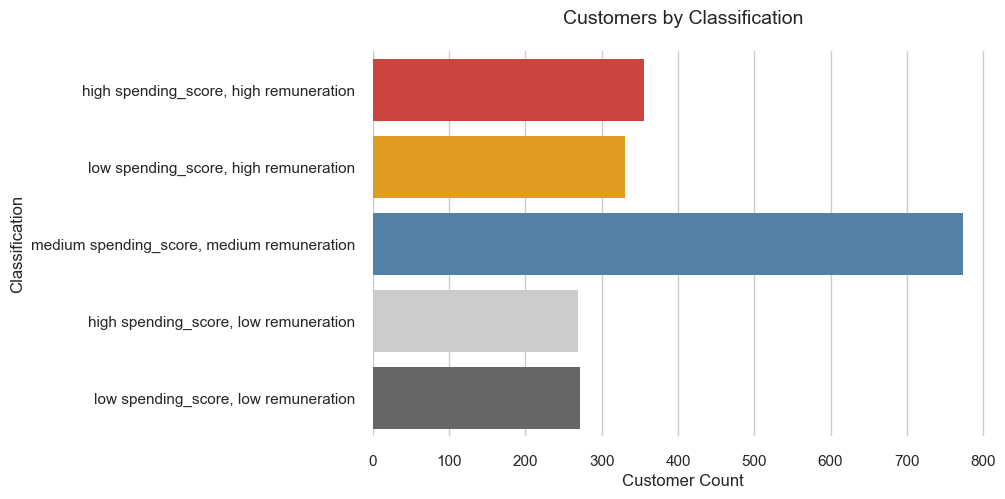

In [334]:
# Show a countplot of the predicted clusters
fig, ax = plt.subplots(figsize=(8, 5))

# plot the chart
sns.countplot(y=tr_classification['classification'], palette=colours)

# setup labels, ticks, spines and title
ax.set_xlabel(r'Customer Count', size=12)
ax.set_ylabel(r'Classification', size=12)
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customers by Classification', size=14, y=1.05)

# show the chart
plt.show()

### Visualisation: Histograms

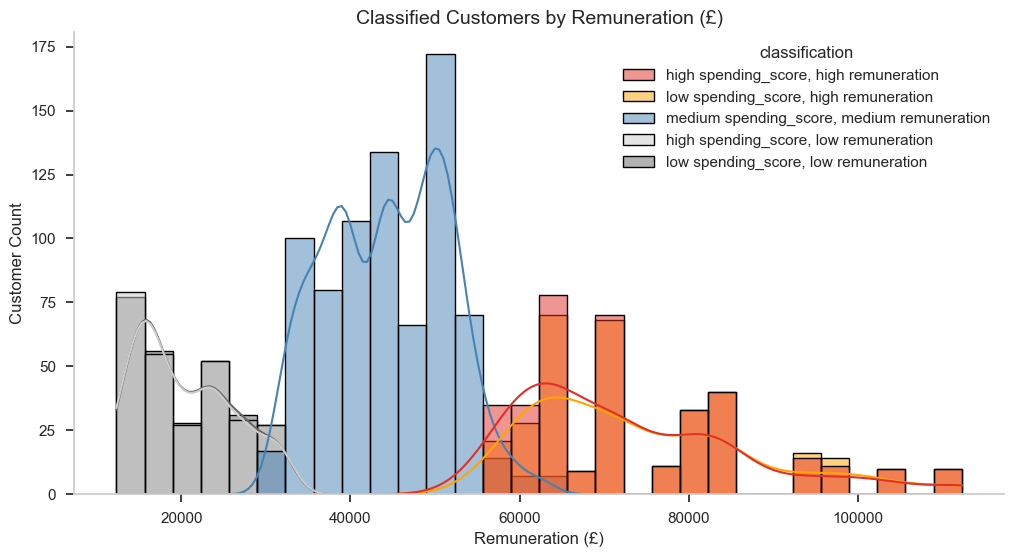

In [333]:
# Show a histogram for remuneration with the predicted clusters
fig, ax = plt.subplots(figsize=(12, 6))

# plot the chart
sns.histplot(data=tr_classification, x='remuneration', hue='classification', \
             palette=colours, bins=30, kde=True)

# setup labels, ticks, spines and title
sns.despine(left=False, bottom=False)
ax.set_xlabel(r'Remuneration (£)', size=12)
ax.set_ylabel(r'Customer Count', size=12)
plt.title('Classified Customers by Remuneration (£)', size=14)

# show the plot
plt.grid(False)
plt.show()

- High remuneration groups share similar distribution pattern.
- Low remuneration groups share similar distribution pattern.


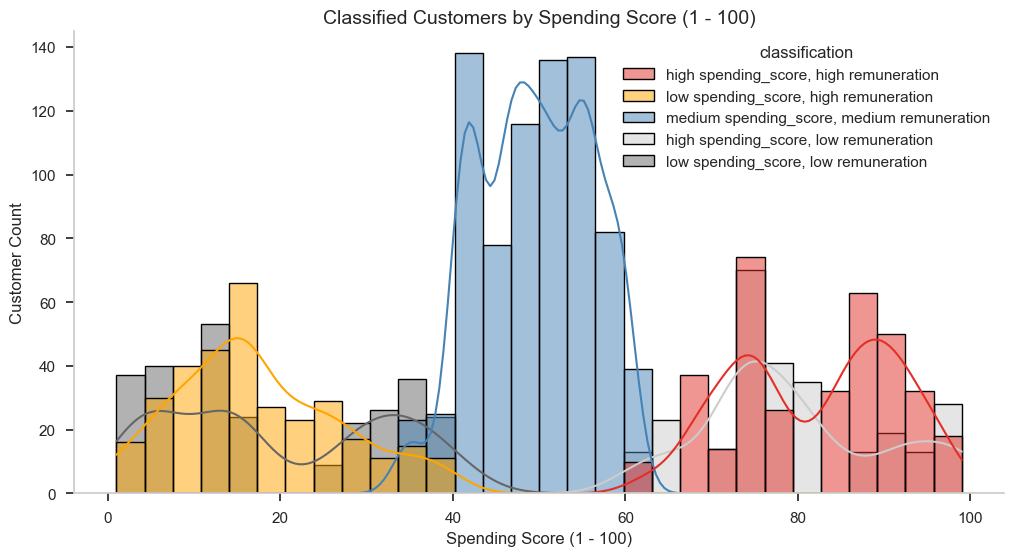

In [232]:
# Show a histogram for spending_score with the predicted clusters
fig, ax = plt.subplots(figsize=(12, 6))

# plot the chart
sns.histplot(data=tr_classification, x='spending_score', hue='classification', \
             palette=colours, bins=30, kde=True)

# setup labels, ticks, spines and title
sns.despine(left=False, bottom=False)
ax.set_xlabel(r'Spending Score (1 - 100)', size=12)
ax.set_ylabel(r'Customer Count', size=12)
plt.title('Classified Customers by Spending Score (1 - 100)', size=14)

# show the plot
plt.grid(False)
plt.show()

### Visualisation: Scatterplots

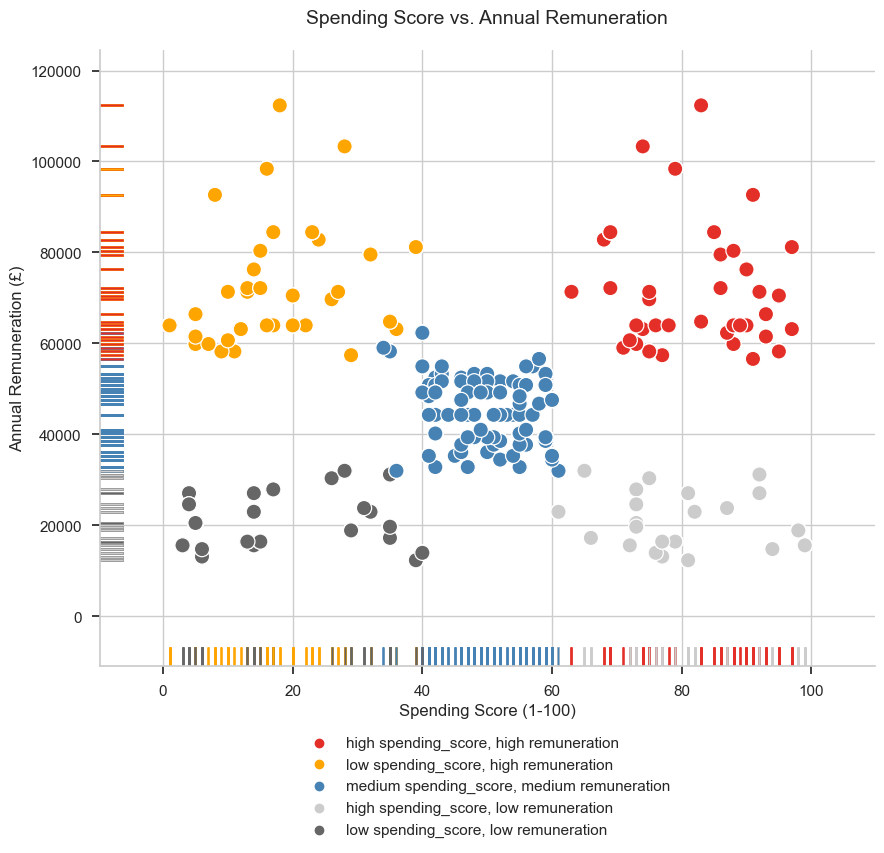

In [233]:
# create a scatterplot showing the relationship between spending_score and remuneration
# with the new classified clusters
fig, ax = plt.subplots(figsize=(10, 8))

# plot chart
sns.scatterplot(data=tr_classification, x='spending_score' , y ='remuneration', \
                hue='classification', s=120, palette=colours)

# add a rugplot to show how the density of the clusters
sns.rugplot(data=tr_classification, x='spending_score', y='remuneration', hue='classification', \
            palette=colours, height=0.03)

# plot the legend
plt.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center')
  
# displaying the title and labels
sns.despine(left=False, bottom=False)
ax.set_xlabel(r'Spending Score (1-100)', size=12)
ax.set_ylabel(r'Annual Remuneration (£)', size=12)
plt.title('Spending Score vs. Annual Remuneration', size=14, y=1.03)


# show chart
plt.show()

# export chart
fig.savefig('clusters.png', dpi=300, bbox_inches='tight')

### 4. Insights & Observations

<div class="alert alert-block alert-success">
    <b>Metadata reminder: </b> spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.
</div>

It is assumed that a high spending_score = high spending in value of pounds (£). While it is acknowledged that spending in value of pounds will not be the only factor in generating the spending_score. Spending_score could also be anticipated to be a function of time, whereas the longer time spent as a customer the more points will be accumulated to the score. Or perhaps the customer spent a large amount in a single visit.

### (i) Calculate the percentage of the total for each different group

In [217]:
# show the value counts for each cluster classification
tr_classification_count = tr_classification['classification'].value_counts().reset_index()

# calculate percentage of total values for each classification
tr_classification_count['percentage'] = \
round((tr_classification_count['classification']/(tr_classification_count['classification'].sum())*100), 2)

# rename columns
tr_classification_count.rename(columns = {'classification':'count', 'index':'classification'}, inplace = True)

# show dataframe
tr_classification_count

classification  count  percentage
0  medium spending_score, medium remuneration    774       38.70
1      high spending_score, high remuneration    356       17.80
2       low spending_score, high remuneration    330       16.50
3        low spending_score, low remuneration    271       13.55
4       high spending_score, low remuneration    269       13.45

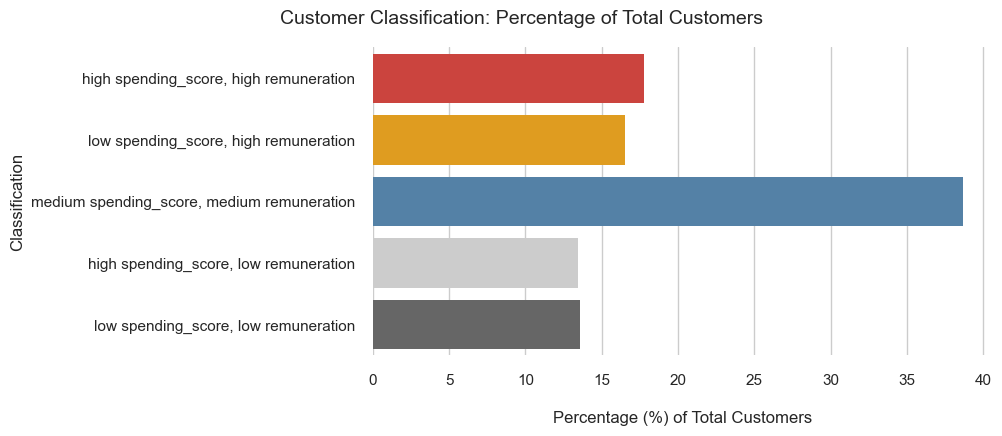

In [332]:
# barplot for classification by percentage of count
fig, ax = plt.subplots(figsize=(8, 4))

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# sns.set_style('ticks')
sns.set_context('notebook')

# plot the chart
sns.barplot(data=tr_classification_count, y='classification', x='percentage')

# setup labels, ticks, spines and title
ax.set_xlabel(r'Percentage (%) of Total Customers', size=12)
ax.set_ylabel(r'Classification', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Percentage of Total Customers', size=14, y=1.05, x=0.24)

# adjust x-axis label position 
ax.xaxis.set_label_coords(0.5, -.18)

# Show the plot
plt.show()

# export chart
fig.savefig('k_means_classification_count.png', dpi=300, bbox_inches='tight')

### (ii) What is the average age of each group?

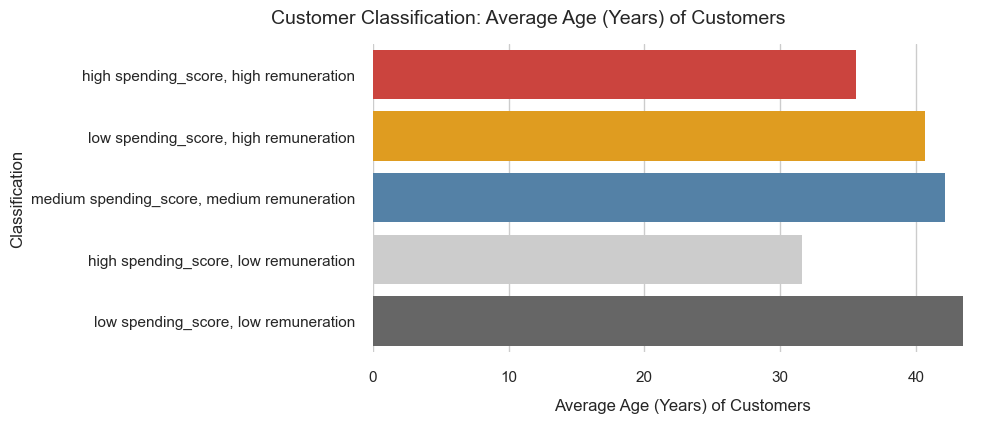

In [287]:
# barplot for classification by average age
fig, ax = plt.subplots(figsize=(8, 4))

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_context('notebook')

# plot the chart
sns.barplot(data=tr_classification, y='classification', x='age', errorbar=('ci', 0))
  
# setup labels, ticks, spines and title
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel(r'Average Age (Years) of Customers', size=12)
ax.set_ylabel(r'Classification', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Average Age (Years) of Customers', size=14, y=1.04, x=0.25)

# adjust x-axis label position 
ax.xaxis.set_label_coords(0.5, -.15)

# Show the plot
plt.show()

# export chart
fig.savefig('k_means_classification_age.png', dpi=300, bbox_inches='tight')

### (iii) How many loyalty points collected by each group?

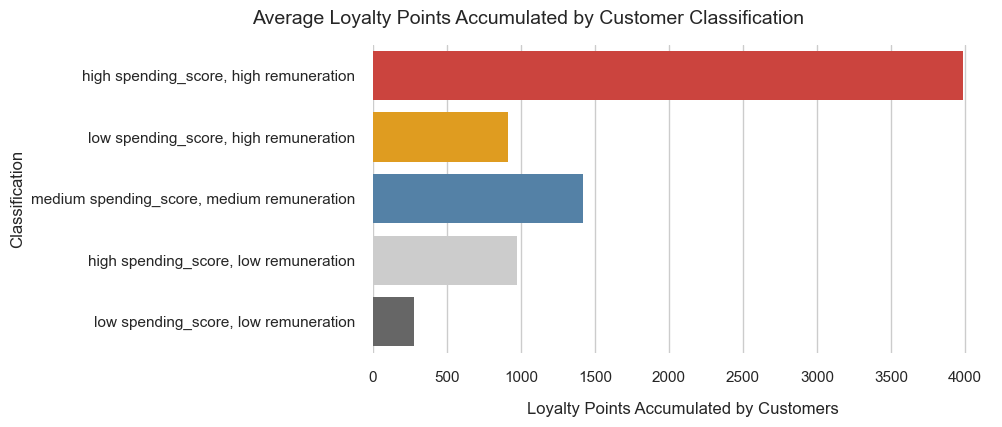

In [290]:
# barplot for classification by average loyalty_points
fig, ax = plt.subplots(figsize=(8, 4))

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_context('notebook')

sns.barplot(data=tr_classification, y='classification', x='loyalty_points', \
            errorbar=('ci', 0))
  
# setup labels, ticks, spines and title
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel(r'Loyalty Points Accumulated by Customers', size=12)
ax.set_ylabel(r'Classification', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Average Loyalty Points Accumulated by Customer Classification', size=14, y=1.04, x=0.25)

# adjust x-axis label position 
ax.xaxis.set_label_coords(0.5, -.16)

# Show the plot
plt.show()

# export chart
fig.savefig('k_means_classification_loyalty_points.png', dpi=300, bbox_inches='tight')

### (iv) How is education represented in each group?

### Group by education

In [262]:
# group the new classifications by education and calculate the mean for loyalty_points,
# age, spending_score & remuneration
group_classification_education = tr_classification.groupby(['classification','education']) \
                       [['loyalty_points','age', 'spending_score', 'remuneration']].mean().round(2) \
                       .reset_index()

group_classification_education

classification      education  loyalty_points  \
0       high spending_score, high remuneration          Basic         4278.12   
1       high spending_score, high remuneration        Diploma         3728.30   
2       high spending_score, high remuneration       Graduate         3949.64   
3       high spending_score, high remuneration  Post-Graduate         3829.92   
4       high spending_score, high remuneration            PhD         4301.07   
5        low spending_score, high remuneration          Basic         1361.94   
6        low spending_score, high remuneration        Diploma          868.96   
7        low spending_score, high remuneration       Graduate          843.77   
8        low spending_score, high remuneration  Post-Graduate          676.08   
9        low spending_score, high remuneration            PhD         1094.06   
10  medium spending_score, medium remuneration          Basic         1287.64   
11  medium spending_score, medium remuneration        Diploma         1399.18   
12  medium spending_score, medium remuneration       Graduate         1430.19   
13  medium spending_score, medium remuneration  Post-Graduate         1421.76   
14  medium spending_score, medium remuneration            PhD         1416.90   
15       high spending_score, low remuneration          Basic          996.00   
16       high spending_score, low remuneration        Diploma          955.90   
17       high spending_score, low remuneration       Graduate          921.51   
18       high spending_score, low remuneration  Post-Graduate         1076.42   
19       high spending_score, low remuneration            PhD          991.06   
20        low spending_score, low remuneration          Basic          283.00   
21        low spending_score, low remuneration        Diploma          288.04   
22        low spending_score, low remuneration       Graduate          277.73   
23        low spending_score, low remuneration  Post-Graduate          294.10   
24        low spending_score, low remuneration            PhD          248.43   

      age  spending_score  remuneration  
0   34.65           89.88      72160.00  
1   37.37           73.74      75622.22  
2   34.85           83.09      71801.79  
3   36.03           84.46      68154.10  
4   36.95           77.66      82053.77  
5   45.89           27.33      69791.11  
6   50.69           16.38      72727.69  
7   36.97           17.22      72577.07  
8   41.89           13.51      70531.39  
9   40.52           19.00      82142.24  
10  45.82           47.09      37720.00  
11  50.51           48.66      40870.53  
12  39.67           49.14      45196.89  
13  42.31           50.88      43764.57  
14  43.01           49.49      45557.21  
15  34.00           73.00      20500.00  
16  44.20           75.40      18860.00  
17  30.53           78.26      19845.22  
18  32.85           82.98      20469.06  
19  30.89           79.59      21435.49  
20  49.00           17.33      20226.67  
21  48.67           18.02      20660.78  
22  38.98           22.03      19186.55  
23  44.38           22.15      20079.49  
24  46.54           15.88      22606.77

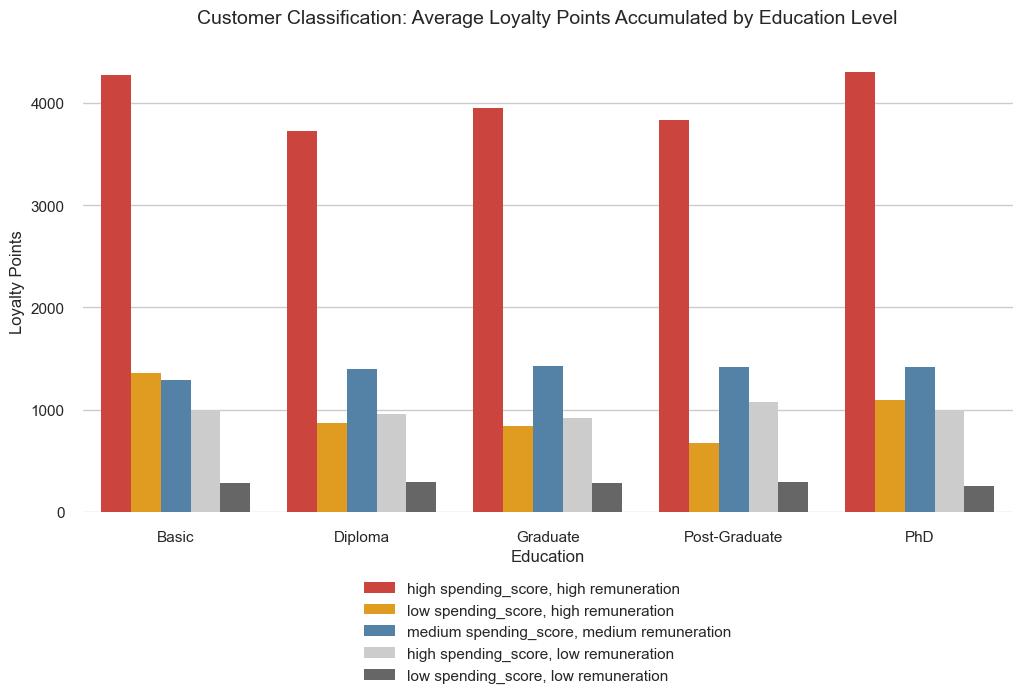

In [320]:
# barplot for classification by education and loyalty_points
fig, ax = plt.subplots(figsize=(12, 6))


sns.barplot(data=tr_classification, x='education', y='loyalty_points', hue='classification', \
            palette=colours, errorbar=('ci', 0))


# setup labels, ticks, spines and title
ax.set_xlabel(r'Education', size=12)
ax.set_ylabel(r'Loyalty Points', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Average Loyalty Points Accumulated by Education Level', \
          size=14, y=1.04)
plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')    
    
# Show the plot
plt.show()

### (v) How is gender represented in each group?

### Group by Gender

In [273]:
# group the new classifications by education and calculate the mean for loyalty_points,
# age, spending_score & remuneration
group_classification_gender = tr_classification.groupby(['classification','gender']) \
                              [['loyalty_points','age', 'spending_score', 'remuneration']].mean().round(2) \
                              .reset_index()

group_classification_gender

classification  gender  loyalty_points    age  \
0      high spending_score, high remuneration  Female         3955.59  34.99   
1      high spending_score, high remuneration    Male         4028.24  36.33   
2       low spending_score, high remuneration  Female         1127.29  41.99   
3       low spending_score, high remuneration    Male          716.17  39.47   
4  medium spending_score, medium remuneration  Female         1437.34  40.70   
5  medium spending_score, medium remuneration    Male         1397.33  44.08   
6       high spending_score, low remuneration  Female          976.90  31.03   
7       high spending_score, low remuneration    Male          965.60  32.34   
8        low spending_score, low remuneration  Female          308.61  41.97   
9        low spending_score, low remuneration    Male          218.59  46.09   

   spending_score  remuneration  
0           81.29      73410.92  
1           82.89      73031.25  
2           20.96      76515.92  
3           14.21      73302.31  
4           49.19      44653.23  
5           50.00      44100.00  
6           80.48      20092.72  
7           78.05      20687.63  
8           20.36      21266.94  
9           18.76      19006.14

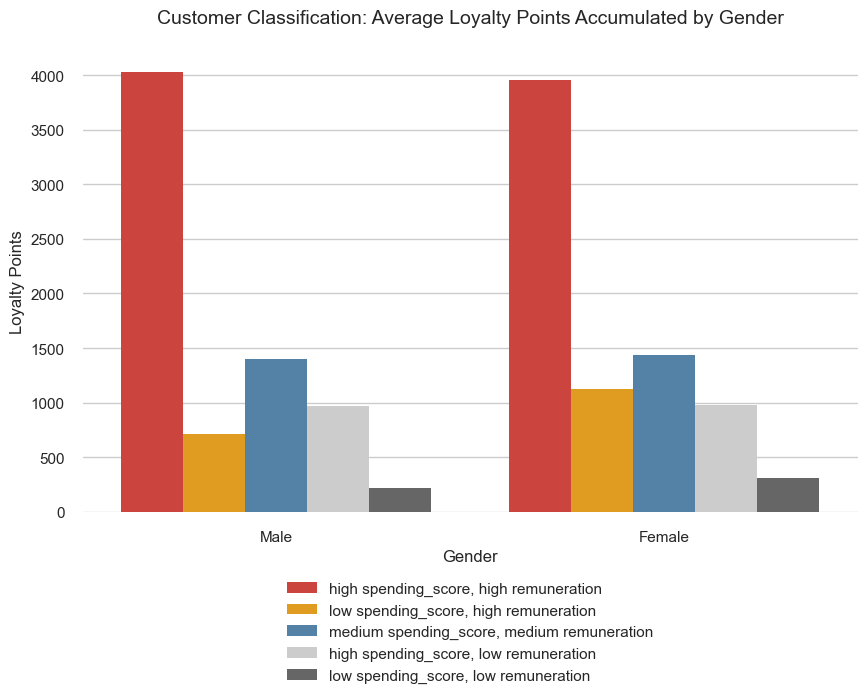

In [324]:
# barplot for classification by average loyalty_points
fig, ax = plt.subplots(figsize=(10, 6))

# plot the chart
sns.barplot(data=tr_classification, x='gender', y='loyalty_points', hue='classification', \
            palette=colours, errorbar=('ci', 0))
 
# setup labels, ticks, spines, legend and title
ax.set_xlabel(r'Gender', size=12)
ax.set_ylabel(r'Loyalty Points', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Average Loyalty Points Accumulated by Gender', size=14, y=1.04)
plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')    
    
# Show the plot
plt.show()

### (vi) Group Analysis

We identified 5 cluster groups of customers within the data relating to spending_score and remuneration which can help inform the marketing campaigns at Turtle Games:

<u><b>Group 1: low spending_score, low remuneration</b></u><br>
- This group is low risk (low value?), they spend relative to their monthly salary.
- This group represents 13.55% of the sample data.
- Average age is 43.5 years old (above average of the dataset which is 39.5). 
- The lowest number of loyalty points collected averaging only 275.

Targeting this group with a marketing campaign may have relatively low success in terms of new sales becuase this group would be risk adverse to spending beyond their means. 


<u><b>Group 2: high spending_score, low remuneration</b></u><br>
- This group is high risk and spend beyond their relative means.
- This group represents 13.45% of the total in this sample data.
- Average age is 31.6 years old which is the youngest grouping.
- Loyalty points collected averages 971 (3rd highest).

This group may purchase impulsively, even though the low yearly income suggests purchases will be less affordable. The lower average age indicates that perhaps some of the customers in this group are living at the parent's home. Despite the low remuneration, this group should be targeted for marketing purposes.The high spending_score coupled with the low loyalty_points suggests that this group may be interested in promotions or bargain buys (many purchases at low prices).


<u><b>Group 3: medium spending_score, medium remuneration</b></u><br>
- This group does not take on any extra risk and tends to spend as anticipated according to the yearly income.
- This group is the largest cluster and represents 38.70% of the total in this sample data.
- Average age is 42 years old which is the above the dataset average.
- Loyalty points collected are quite high at 1,420 (2nd highest).

This largest group is the 'bread-and-butter' of the business and should never be ignored. Average age suggests that they may be long-term loyal customers.


<u><b><b>Group 4: low spending_score, high remuneration</b></u><br>
- This group has lower interest in the products on sale, which can easily be purchased based on the yearly salary. Or perhaps the customers are new and have not built up a high spending_score yet.
- This group represents 16.50% of the total in this sample data.
- Average age is 40.66 years old which is the above the dataset average.
- Loyalty points collected are not impressive at 911 (2rd lowest).

Despite being able to afford to purchase, customers in this group show little interest in the products. It may be less cost-effective to target this group with the marketing budget.
    

<u><b>Group 5: high spending_score, high remuneration</b></u><br>
- This group has a great deal of interest in the products on sale, and they can easily afford to purchase more based on the yearly salary.
- This group represents 17.80% of the total in this sample data (2nd largest group).
- Average age is 35.60 years old which is the below the dataset average (2nd youngest group).
- Loyalty points collected are the most impressive at 3,988 (top).
    
This group has the most disposable income and doesn't mind spending it, possibly purchasing some of the most expensive products. The marketing department should always include this group in any new campaign.

### (vii) Take a look at how the new group classification fits with the regression models

### Remuneration vs. Loyalty Points

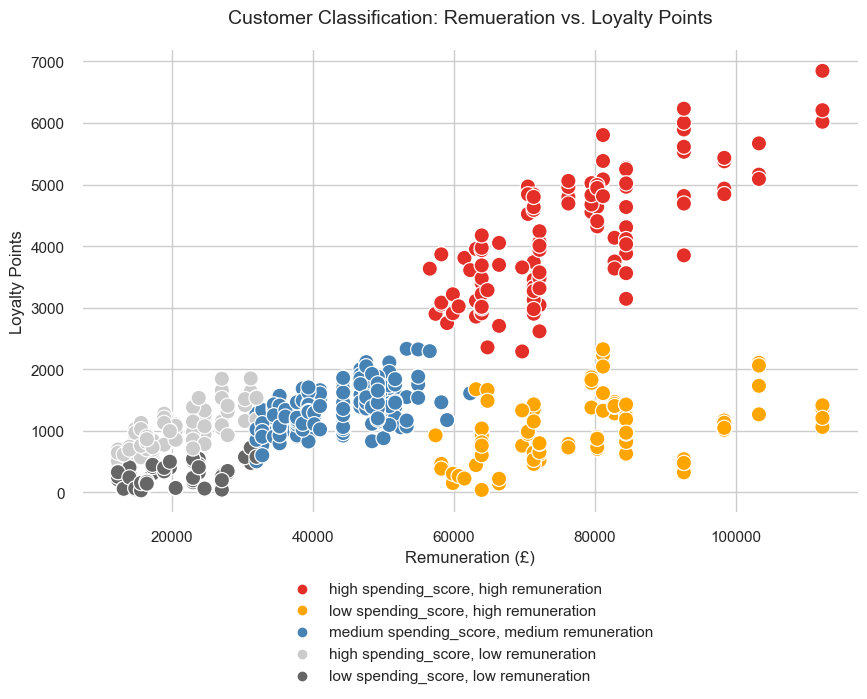

In [328]:
# visualise the relationship between remuneration and loyalty_points
fig, ax = plt.subplots(figsize=(10, 6))

# plot the scatterplot
sns.scatterplot(data=tr_classification, x='remuneration' , y ='loyalty_points', \
                hue='classification', s=120, palette=colours)

# setup labels, ticks, spines, legend and title
ax.set_xlabel(r'Remuneration (£)', size=12)
ax.set_ylabel(r'Loyalty Points', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Remueration vs. Loyalty Points', size=14, y=1.04)
plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')  

# show the chart
plt.show()

Remember, the linear regression model for loyalty_points and remuneration shows a strong positive correlation. By including the new classification model, it adds value to the data. It confirms previous expectations that by removing data points with remuneration above 60,000 and loyalty_points below 2500 (low spending_score, high remuneration), the  predictive power of our regression model will be much improved.

The groups appear to be heterogenous, clearly delineated.

### Spending Score vs. Loyalty Points

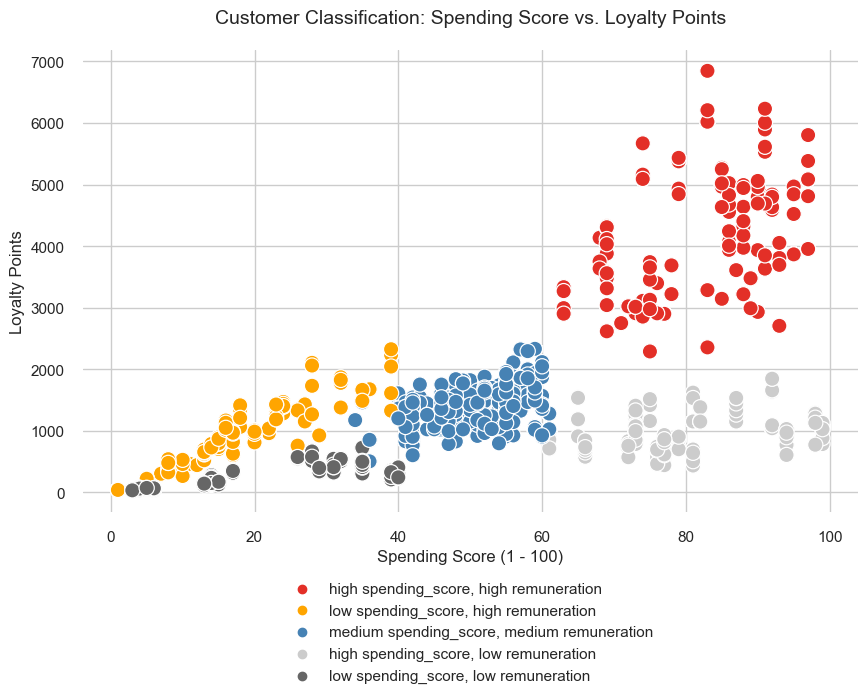

In [329]:
# visualise the relationship between spending_score and loyalty_points
fig, ax = plt.subplots(figsize=(10, 6))

# plot the scatterplot
sns.scatterplot(data=tr_classification, x='spending_score' , y ='loyalty_points', \
                hue='classification', s=120, palette=colours)

# setup labels, ticks, spines, legend and title
ax.set_xlabel(r'Spending Score (1 - 100)', size=12)
ax.set_ylabel(r'Loyalty Points', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Spending Score vs. Loyalty Points', size=14, y=1.04)
plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')  

# show the chart
plt.show()

A clear positive correlation between spending_score and loyalty_points was already identified. The anomaly appears to be the 'high spending_score, low remuneration' (orange) group, perhaps this can be explained as group being interested in promotions or bargain buys (many purchases at low prices) which do little to add to the customer loyalty_points total.

### Age vs. Loyalty Points

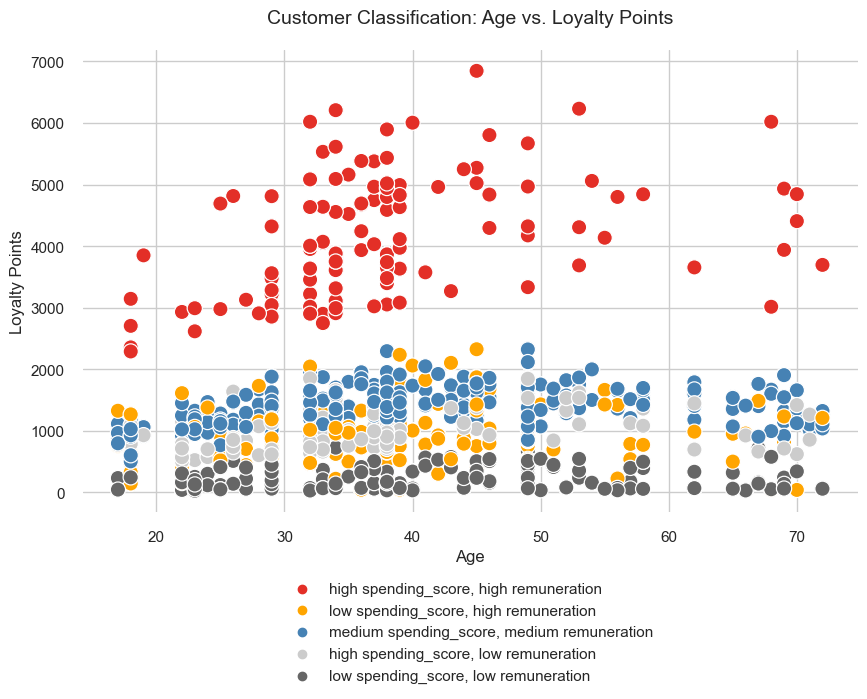

In [330]:
# visualise the relationship between age and loyalty_points
fig, ax = plt.subplots(figsize=(10, 6))

# plot the scatterplot
sns.scatterplot(data=tr_classification, x='age' , y ='loyalty_points', \
                hue='classification', s=120, palette=colours)

# setup labels, ticks, spines, legend and title
ax.set_xlabel(r'Age', size=12)
ax.set_ylabel(r'Loyalty Points', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Customer Classification: Age vs. Loyalty Points', size=14, y=1.04)
plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')  

# show the chart
plt.show()

Previously, this visualisation offered little value, but by including the new group classification there appears to be 'layers' which illustrates that despite age, loyalty points appear to be accumulated based on higher yearly income. The anomaly in this chart is that the group 'low spending_score, high remuneration' appears to be mixed up randomly within the other 3 groups with loyalty points below 2000. There is a clear and obvious distinction between the 'high spending_score, high remuneration' group and the other 4 groups.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">7. Analysing Customer Sentiments with Reviews</h2></th>
        <th><a id="7"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

Natural Language Processing (NLP) requires the usage of many datasets (corpus, stopwords etc.) which may be regularly updated.

### Check for Updates to NLP Datasets

In [348]:
# Check for updates to the NLTK dictionaries
nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Import Data and Check for Duplicates

In [357]:
# import turtle_reviews
tr = pd.read_csv('tr.csv')

In [358]:
# check the head
tr.head(1)

gender  age  remuneration  spending_score  loyalty_points education  \
0   Male   18         12300              39             210  Graduate   

   product_id  \
0         453   

                                                                                                review  \
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...   

                                                                                            summary  
0  The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...

In [359]:
# check for duplicates in the review, summary and product_id columns
duplicates = tr[tr[['review', 'summary', 'product_id']].duplicated()]

duplicates.head()

gender  age  remuneration  spending_score  loyalty_points education  \
1006  Female   37         14760               6              61   Diploma   

      product_id      review     summary  
1006        1183  great game  Five Stars

In [360]:
# check for duplicates by review only and show original and duplicated reviews
review_text = tr["review"]

tr[review_text.isin(review_text[review_text.duplicated()])].sort_values("review")

gender  age  remuneration  spending_score  loyalty_points  \
1435  Female   23         50840              41            1095   
1553  Female   38         79540              32            1779   
1651    Male   35         20500              73            1010   
1037  Female   32         27880              73            1314   
933   Female   33         59040              71            2750   
294   Female   34         49200              42            1376   
1186  Female   53         82820              24            1469   
1414    Male   39         98400              16            1111   
1302    Male   69         50840              59            1904   
55      Male   45         35260              41            1062   
371     Male   32         71340              75            3455   
1544    Male   27         71340              75            3129   
1382    Male   44         80360              15             881   
959   Female   32         63960              73            3015   
430     Male   62         24600               4              69   
702     Male   69         50840              59            1904   
1713    Male   18         13120              77             442   
1154  Female   45         63960              16             752   
1155  Female   29         63960              89            3478   
1266  Female   41         39360              50            1413   
1267  Female   70         39360              48            1177   
408     Male   66         15580               3              31   
94    Female   34         49200              42            1376   
1006  Female   37         14760               6              61   
810     Male   69         15580              14             138   
811   Female   37         15580              99            1067   
1540  Female   56         84460              23            1420   
48    Female   29         32800              42             842   
416   Female   37         17220              35             417   
326     Male   41         58220              35            1463   
1337    Male   34         59860              73            2910   
1145    Male   32         63140              97            3954   
1144    Male   27         63140              12             443   

          education  product_id  \
1435            PhD        4459   
1553            PhD        6431   
1651  Post-Graduate        4452   
1037  Post-Graduate        2130   
933        Graduate        4477   
294        Graduate        6770   
1186  Post-Graduate        3711   
1414       Graduate         811   
1302            PhD        5453   
55         Graduate        3896   
371         Diploma        5726   
1544  Post-Graduate        3267   
1382            PhD        1031   
959        Graduate       11086   
430             PhD        2173   
702             PhD        6424   
1713       Graduate        7533   
1154            PhD       11086   
1155  Post-Graduate        3153   
1266  Post-Graduate         399   
1267        Diploma         504   
408             PhD        1459   
94         Graduate        6721   
1006        Diploma        1183   
810         Diploma        1175   
811   Post-Graduate        1183   
1540        Diploma       11084   
48         Graduate        2079   
416        Graduate         830   
326        Graduate        2849   
1337        Diploma        4702   
1145          Basic        6271   
1144  Post-Graduate        4712   

                                                                                                   review  \
1435                                                                                          As expected   
1553                                                                                          As expected   
1651                                                                                          As expected   
1037                                                                                              Aw

> The duplicates do not share values in the education, gender, remuneration, age, loyalty_points, spending_score columns. Therefore, we can keep the duplicates because they will give a more accurate reflection of the overall sentiment of the customers in this dataset.

In [361]:
# Check the number of duplicate values in the summary column
duplicates = tr[tr['summary'].duplicated()]

duplicates.head(50)

gender  age  remuneration  spending_score  loyalty_points      education  \
5    Female   24         13940              76             573            PhD   
7    Female   25         14760              94             772       Graduate   
10     Male   69         15580              14             138        Diploma   
15     Male   24         16400              79             701       Graduate   
27     Male   37         22960              61             969       Graduate   
41     Male   26         31160              92            1637            PhD   
43   Female   33         31980              61            1280       Graduate   
44   Female   49         31980              28             664        Diploma   
45   Female   26         31980              65            1187       Graduate   
46   Female   49         32800              55            1338       Graduate   
47   Female   29         32800              47             942  Post-Graduate   
48   Female   29         32800              42             842       Graduate   
49   Female   33         32800              42             904       Graduate   
55     Male   45         35260              41            1062       Graduate   
70     Male   72         40180              55            1322            PhD   
73   Female   62         41000              56            1605       Graduate   
76   Female   43         44280              53            1707       Graduate   
78   Female   25         44280              52            1281  Post-Graduate   
79   Female   49         44280              42            1379       Graduate   
82     Male   69         44280              41            1152       Graduate   
86   Female   54         46740              58            1998        Diploma   
87   Female   24         46740              55            1391       Graduate   
89   Female   49         47560              46            1622       Graduate   
93   Female   38         49200              40            1376            PhD   
94   Female   34         49200              42            1376       Graduate   
99     Male   22         50020              49            1248            PhD   
102    Male   69         50840              59            1904            PhD   
158    Male   36         63960               1              44  Post-Graduate   
162    Male   18         66420               5             145       Graduate   
165  Female   38         69700              75            3654            PhD   
166    Male   40         70520              20            1004            PhD   
172    Male   38         71340              10             499       Graduate   
175  Female   32         72160              86            4007  Post-Graduate   
181  Female   34         79540              86            4555          Basic   
184  Female   39         81180              39            2235            PhD   
185    Male   32         81180              97            5084       Graduate   
191  Female   34         84460              69            3880        Diploma   
194  Female   45         98400              16            1156       Graduate   
198    Male   34        112340              18            1346            PhD   
204  Female   33         13940              40             366       Graduate   
209  Female   32         15580              72             724            PhD   
212  Female   57         16400              15             179            PhD   
213  Female   26         16400              77             721       Graduate   
214    Male   39         16400              13             150       Graduate   
216  Female   37         17220              35             417       Graduate   
218    Male   51         18860              29             406        Diploma   
220    Male   37         19680              35             476  Post-Graduate   
222  Female   44         20500               5              75  Post-Graduate   
227    Male   37         22960      

> Duplicates are for very short summary text. We can keep the duplicates, but will decide to only use the review column for NLP based on the summary column being a shortened version of review.

### Create Dataset with Reviews Column

In [362]:
# create new dataset for reviews
tr_nlp = tr[['review']]

In [363]:
tr_nlp.head(1)

review
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...

### 1. Pre-Processing Reviews for Analysis

### Function to pre-process reviews

In [364]:
# Function to pre-process the review
# Pass review string variable and output bag_of_words
def bag_of_words(review):
    bag_of_words = review
    bag_of_words = " ".join(bag_of_words.lower() for bag_of_words in bag_of_words.split())   # lower case all words
    bag_of_words = " ".join(word for word in bag_of_words.split() if word not in stop_words) # remove stop-words
    bag_of_words = " ".join(Word(word).lemmatize() for word in bag_of_words.split())         # lemmatize with textblob
    
    return(bag_of_words)

In [365]:
# create stop_words list (used in the bag_of_words function)
stop_words = stopwords.words('english')

#### Example of how the function works:

In [366]:
# illustrate how lemmatization works (in this case removing pluralisation)
w = Word("games")
w.lemmatize()

'game'

In [367]:
print('Original Review\n', tr_nlp['review'][500])

Original Review
 Very popular game in my therapy work with kids!
Love how they can relate it to playing traditional "UNO" game.


In [369]:
print('Pre-processed Review\n', bag_of_words(tr_nlp['review'][500]))

Pre-processed Review
 popular game therapy work kids! love relate playing traditional "uno" game.


### (i) Create bag_of_words

In [370]:
# Create a bag_of_words column from the review column and remove punctuation
tr_nlp['bag_of_words'] = tr_nlp['review'].str.replace('[^\w\s]', '')

tr_nlp.head(1)

review  \
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...   

                                                                                          bag_of_words  
0  When it comes to a DMs screen the space on the screen itself is at an absolute premium The fact ...

In [371]:
# Pass reviews to the bag_of_words function
tr_nlp['bag_of_words'] = tr_nlp['bag_of_words'].apply(lambda x: bag_of_words(x))

In [372]:
# show the processed review, now a bag_of_words
tr_nlp.head(3)

review  \
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...   
1  An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards a...   
2  Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyon...   

                                                                                          bag_of_words  
0  come dm screen space screen absolute premium fact 50 space wasted art terribly informative neede...  
1  open letter galeforce9 unpainted miniature bad spell card great board game meh dm screen however...  
2  nice art nice printing two panel filled general forgotten realm map beyond one blue ocean waste ...

### (ii) Create a Frequency Distribution of the Most Common Words

In [373]:
# join all the text together from all bag_of_words in the dataset
text = " ".join(review for review in tr_nlp['bag_of_words'])
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 374009 words in the combination of all reviews.


In [374]:
# tokenise the words 
word_tokens = word_tokenize(text)

# create a frequency distribution
freq_dist = FreqDist(word_tokens)

In [375]:
# convert frequency distribution into a pandas series and reset_index
freq_dist = pd.Series(dict(freq_dist)).to_frame().sort_values(by=0, ascending=False).reset_index()

# rename columns
freq_dist.columns = ['word', 'count']

# show the top 10 words of frequency distribution
freq_dist[:10]

word  count
0   game   1941
1  great    596
2    one    572
3    fun    553
4   play    542
5   love    477
6   like    434
7   card    431
8   tile    400
9    get    369

### Plot the Frequency Distribution

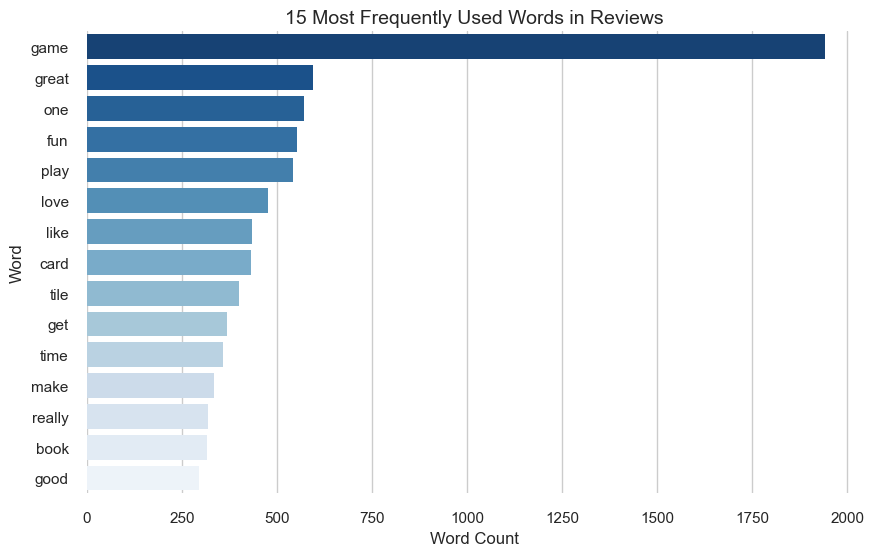

In [411]:
# plot the top 15 words in the frequency distribution
fig, ax = plt.subplots(figsize=(10, 6))

# plot the chart
sns.barplot(data=freq_dist[:15], x='count', y='word', palette='Blues_r')

# labels, spines and ticks
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('15 Most Frequently Used Words in Reviews', size=14)
plt.ylabel("Word")
plt.xlabel("Word Count")

# show the chart
plt.show()

> 'game' is the top word used in all the reviews. Many of the words have positive sentiment e.g. great, fun, love, like, good.

### (iii) Make a Wordcloud to Visualise the Top Words

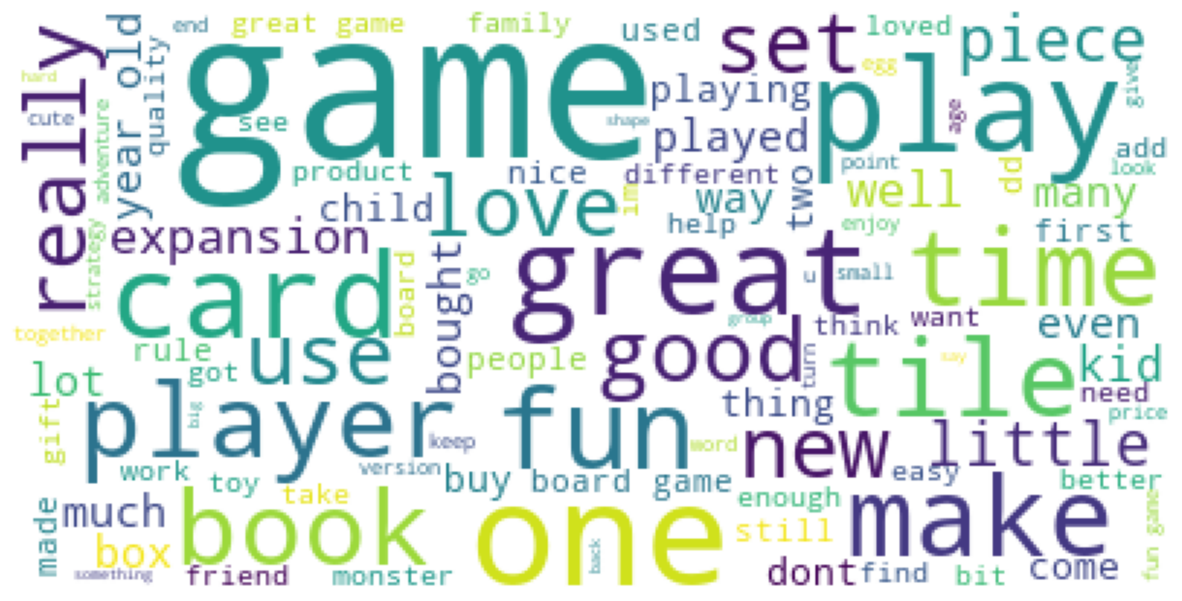

In [379]:
# generate a Wordcloud
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 2. Sentiment Analysis

### Section 1: NPL Models

4 different models will be tested to determine which model should be used by Turtle Games, and how the model can help to inform future marketing campaigns.

- [TextBlob][id71]
- [VADER (Valence Aware Dictionary and sEntiment Reasoner)][id72]
- [SiEBERT (Sentiment in English BERT)][id73]
- [bert-base-multilingual-uncased-sentiment][id74]

[id71]:https://textblob.readthedocs.io/en/dev
[id72]:https://pypi.org/project/vaderSentiment
[id73]:https://huggingface.co/siebert/sentiment-roberta-large-english
[id74]:https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

Sample text for testing:

In [380]:
test_review = tr_nlp['review'][63]

test_review

'total waste of money. the stickers do not stick down even once\nit is just a tiny amount of stickers which do not work, and that is basically it. I thought the backgrounds would make this special but it just is tiny and does not work.\nmuch better to simply buy packs of stickers and use paper\nthe activity books in this series are better'

In [381]:
test_bag_of_words = tr_nlp['bag_of_words'][63]

test_bag_of_words

'total waste money sticker stick even tiny amount sticker work basically thought background would make special tiny work much better simply buy pack sticker use paper activity book series better'

### (i) TextBlob

TextBlob returns 2 variables: polarity and subjectivity.

- Polarity measures the sentiment of the text. It returns a value between -1 and 1, where 1 is positive and -1 is negative. 
- Subjectivity measures the the amount of personal opinion is in the text. It returns a value between 0 and 1, where 0 is factual and 1 is personal opinion.

In [382]:
print(f'Polarity Score: {round(TextBlob(test_bag_of_words).sentiment.polarity,3)}')

Polarity Score: 0.145


0.145 means the sentiment of the text is close to neutral.

In [383]:
print(f'Subjectivity Score: {round(TextBlob(test_bag_of_words).sentiment.subjectivity,3)}')

Subjectivity Score: 0.46


0.46 means the text is more slightly more objective than subjective.

### (ii) VADER Sentiment

VADER returns 4 variables: neg, neu, pos and compound.

- 'neg' measures the negative sentiment of the text. It returns a value between 0 and 1, where 1 is more negative. 
- 'neu' measures the neutral sentiment of the text. It returns a value between 0 and 1, where 1 is more neutral. 
- 'pos' measures the positive sentiment of the text. It returns a value between 0 and 1, where 1 is more positive. 
- 'compound' measures the overall sentiment of the text. It returns a value between -1 and 1, where 1 is positive and -1 is negative. A positive sentiment will be a compound score ≥ 0.05, while a negative sentiment will be compound score ≤ -0.05.

In [384]:
# Create an object for the model
sia = SentimentIntensityAnalyzer()

In [385]:
# Pass the test_review to the model
sia.polarity_scores(test_bag_of_words)

{'neg': 0.082, 'neu': 0.692, 'pos': 0.226, 'compound': 0.6605}

The 'compound' score is most relevent to this task, a value of 0.66 rates the review to be positive sentiment.

### (iii) SiEBERT Model Pipeline

The model produces a 'NEGATIVE' or 'POSITIVE' label to classify sentiment. The score value (range 0 to 1) rates the confidence in the classification label with 1 being high confidence.

<div class="alert alert-block alert-danger">
<b>Important:</b> If this code is run for the first time, the model must be downloaded which may take a few minutes.
</div>

In [386]:
# Instantiate the model pipeline
sentiment_pipeline_siebert = pipeline(model='siebert/sentiment-roberta-large-english')

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [387]:
sentiment_pipeline_siebert(test_review)

[{'label': 'NEGATIVE', 'score': 0.9995129108428955}]

The classification is 'NEGATIVE' with a 0.999 score for confidence (extremely high).

### (iv) NLP Town BERT Model Pipeline

This model produces a star rating (1 - 5) and score between 0 and 1.

- The star rating is betwen 1 and 5, with 5 being positive.
- The score signifies the confidence in the star rating, with 1 being high confidence.

<div class="alert alert-block alert-danger">
<b>Important:</b> If this code is run for the first time, the model must be downloaded which may take a few minutes.
</div>

In [388]:
# Instantiate the model pipeline
sentiment_pipeline_nlptown = pipeline(model='nlptown/bert-base-multilingual-uncased-sentiment')

In [389]:
sentiment_pipeline_nlptown(test_review)

[{'label': '1 star', 'score': 0.7752600312232971}]

The rating is 1 star with a high confidence value of 0.775. The interpretation is that the test review is negative sentiment.

### Section 2: Choosing A Model

<div class="alert alert-block alert-danger">
<b>Important:</b> The BERT models will throw errors for text longer than 512 words. The next section will reduce the 'review' and 'bag_of_words' columns to maximum 500 words.
</div>

### Trim Words in Reviews to be Maximum 350

In [390]:
# how many words in the review. There are less than 35 reviews with more than 350 words.
tr_nlp['review'].str.split().str.len().reset_index().sort_values(by='review', ascending=False)[:35]

index  review
879     879    1465
1295   1295    1178
1103   1103    1131
836     836    1043
1121   1121    1013
1119   1119     994
1666   1666     993
1570   1570     757
1097   1097     689
857     857     669
1357   1357     665
1575   1575     655
928     928     624
1565   1565     570
976     976     569
1116   1116     553
893     893     539
1063   1063     523
1073   1073     488
358     358     488
1258   1258     481
1280   1280     478
926     926     443
156     156     433
931     931     427
1471   1471     412
1175   1175     397
1559   1559     395
1323   1323     381
1113   1113     369
1328   1328     364
1781   1781     360
1784   1784     357
930     930     351
1493   1493     348

In [391]:
# set the maximum number of words to be 350
def converter(x):
    try:
        return ' '.join(x.split(maxsplit=350)[:350])
    except AttributeError:
        return None  # or some other value

# trim the reviews to maximum length 0f 350
tr_nlp['review'] = tr_nlp['review'].apply(converter)

In [392]:
# check to make sure the function worked
tr_nlp['review'].str.split().str.len().reset_index().sort_values(by='review', ascending=False)[:5]

index  review
1073   1073     350
1328   1328     350
1295   1295     350
1784   1784     350
926     926     350

### Function to Return Sentiment Scores

In [393]:
# setup the NLP Town BERT model (we only want the star rating value)
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [394]:
# Function to perform sentiment analysis on text
# df = dataframe containing text for sentiment analysis
def sentiment_analyser(df):
    
    # setup empty dataframes
    sentiment_scores = pd.DataFrame()
    
    # loop through rows of df
    for i, row in tqdm(df.iterrows(), total=len(df)):
        
        df_siebert = pd.DataFrame()
        df_sentiment = pd.DataFrame()
        
        # SiEBERT Model breaks if word count too high
        try:
            siebert = sentiment_pipeline_siebert(row['review'])  # SiEBERT Model
            df_siebert = pd.DataFrame(siebert)                   # store sentiment scores in dataframe
        except RuntimeError:
            # if it breaks print the id
            print(f'SiEBERT Model Broke for id {row}')
            
        # NLP Town BERT Model breaks if word count too high
        try:
            bert = model(tokenizer.encode(row['review'], return_tensors='pt')).logits  # NLP Town BERT Model
            star_rating = int(torch.argmax(bert))+1
        except RuntimeError:
            # if it breaks print the id
            star_rating = np.nan
            print(f'NLP Town BERT Model Broke for id {row}')
            
        vader = sia.polarity_scores(row['bag_of_words'])        # vaderSentiment Model
        textblob = TextBlob(row['bag_of_words']).sentiment      # TextBlob Model
    
        # store sentiment scores in dataframes
        df_vader = pd.DataFrame(vader, index=[0])
        df_textblob = pd.DataFrame(textblob).T
        
        # concat the dataframes
        df_sentiment = pd.concat([df_siebert, df_vader, df_textblob], axis=1)
        df_sentiment['rating'] = star_rating
        
        # append row dataframe to sentiment_scores dataframe
        sentiment_scores = sentiment_scores.append(df_sentiment, ignore_index=True)
        
        
    # setup column names as dictionary
    col_names = {'label' : 'siebert_label', \
                 'score' : 'siebert_score', \
                 'neg' : 'vader_neg', \
                 'neu' : 'vader_neu', \
                 'pos' : 'vader_pos', \
                 'compound' : 'vader_compound', \
                  0 : 'textblob_polarity', \
                  1 : 'textblob_subjectivity', \
                 'rating' : 'bert_rating'}
    
    # rename columns
    sentiment_scores.rename(columns=col_names, inplace=True)
    
    # concat sentiment_scores with df and set index
    sentiment = pd.concat([df, sentiment_scores], axis=1)
    sentiment = sentiment.set_index('index').round(3)
    # sentiment.round(3)
    
    return(sentiment)

### (i) Return Sentiment Scores for Every Review

In [395]:
# test the sentiment_analyser function on 3 reviews
tr_sentiment_test = sentiment_analyser(tr_nlp.iloc[0:3].reset_index())

tr_sentiment_test

  0%|          | 0/3 [00:00<?, ?it/s]

review  \
index                                                                                                        
0      When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fa...   
1      An Open Letter to GaleForce9*: Your unpainted miniatures are very not bad. Your spell cards are ...   
2      Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond...   

                                                                                              bag_of_words  \
index                                                                                                        
0      come dm screen space screen absolute premium fact 50 space wasted art terribly informative neede...   
1      open letter galeforce9 unpainted miniature bad spell card great board game meh dm screen however...   
2      nice art nice printing two panel filled general forgotten realm map beyond one blue ocean waste ...   

      siebert_label  siebert_score  vader_neg  vader_neu  vader_pos  \
index                                                                 
0          NEGATIVE          1.000      0.310      0.646      0.044   
1          NEGATIVE          1.000      0.204      0.544      0.252   
2          NEGATIVE          0.999      0.191      0.578      0.231   

       vader_compound  textblob_polarity  textblob_subjectivity  bert_rating  
index                                                                         
0              -0.915             -0.243                  0.429            2  
1               0.702             -0.041                  0.437            2  
2               0.661              0.125                  0.466            2

<div class="alert alert-block alert-danger">
<b>Important:</b> Running the code below will take up to 30 minutes.
</div>

In [138]:
# pass the tr_nlp dataframe to the sentiment_analyser
tr_sentiment = sentiment_analyser(tr_nlp.reset_index())

  0%|          | 0/2000 [00:00<?, ?it/s]

SiEBERT Model Broke for id index                                                        1121
review          Disclaimer: Bought this from a local store. Pa...
bag_of_words    disclaimer bought local store paid list value ...
Name: 1121, dtype: object
NLP Town BERT Model Broke for id index                                                        1121
review          Disclaimer: Bought this from a local store. Pa...
bag_of_words    disclaimer bought local store paid list value ...
Name: 1121, dtype: object
SiEBERT Model Broke for id index                                                        1258
review          Three stars or five? Depends. This your first ...
bag_of_words    three star five depends first tile set first t...
Name: 1258, dtype: object
NLP Town BERT Model Broke for id index                                                        1258
review          Three stars or five? Depends. This your first ...
bag_of_words    three star five depends first tile set first t...
Name: 1258

> The errors were for processing long reviews. 5 rows effected.

In [147]:
# check the info of the new tr_sentiment dataframe
tr_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review                 2000 non-null   object 
 1   bag_of_words           1999 non-null   object 
 2   siebert_label          1998 non-null   object 
 3   siebert_score          1998 non-null   float64
 4   vader_neg              2000 non-null   float64
 5   vader_neu              2000 non-null   float64
 6   vader_pos              2000 non-null   float64
 7   vader_compound         2000 non-null   float64
 8   textblob_polarity      2000 non-null   float64
 9   textblob_subjectivity  2000 non-null   float64
 10  bert_rating            1996 non-null   float64
dtypes: float64(8), object(3)
memory usage: 172.0+ KB


> Some missing values where the BERT models couldn't process the review. There is also a missing value in bag_of_words which would be because the pre-processing removed the words from the review text.

In [140]:
# export tr_sentiment to csv file
tr_sentiment.to_csv('tr_sentiment.csv', index=False)

<div class="alert alert-block alert-info">
<b>NOTE:</b> The code above is not run in order because it took more than 30 minutes to execute. Instead, you can continue below by importing the data the code produced.
</div>

### Import Sentiment Scores

In [5]:
# import tr_sentiment
tr_sentiment = pd.read_csv('tr_sentiment.csv')

# check tr_sentiment head
tr_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review                 2000 non-null   object 
 1   bag_of_words           1999 non-null   object 
 2   siebert_label          1998 non-null   object 
 3   siebert_score          1998 non-null   float64
 4   vader_neg              2000 non-null   float64
 5   vader_neu              2000 non-null   float64
 6   vader_pos              2000 non-null   float64
 7   vader_compound         2000 non-null   float64
 8   textblob_polarity      2000 non-null   float64
 9   textblob_subjectivity  2000 non-null   float64
 10  bert_rating            1996 non-null   float64
dtypes: float64(8), object(3)
memory usage: 172.0+ KB


In [6]:
# check tr_sentiment head
tr_sentiment.head(5)

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*: Your unpainted ...   
2  Nice art, nice printing. Why two panels are fi...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                        bag_of_words siebert_label  \
0  come dm screen space screen absolute premium f...      NEGATIVE   
1  open letter galeforce9 unpainted miniature bad...      NEGATIVE   
2  nice art nice printing two panel filled genera...      NEGATIVE   
3             amazing buy bought gift new dm perfect      POSITIVE   
4  review gf9s previous screen completely unneces...      NEGATIVE   

   siebert_score  vader_neg  vader_neu  vader_pos  vader_compound  \
0          1.000      0.310      0.646      0.044          -0.915   
1          1.000      0.204      0.544      0.252           0.702   
2          0.999      0.191      0.578      0.231           0.661   
3          0.999      0.000      0.278      0.722           0.886   
4          1.000      0.370      0.630      0.000          -0.706   

   textblob_polarity  textblob_subjectivity  bert_rating  
0             -0.243                  0.429          2.0  
1             -0.041                  0.437          2.0  
2              0.125                  0.466          2.0  
3              0.579                  0.785          5.0  
4             -0.317                  0.317          1.0

Now the sentiment scores are ready for analysis.

### Remove NaN Values

In [7]:
# check to see where are the null values
tr_sentiment_na = tr_sentiment.isna().sum()
print("Missing values in DataFrame:")
print(tr_sentiment_na)

Missing values in DataFrame:
review                   0
bag_of_words             1
siebert_label            2
siebert_score            2
vader_neg                0
vader_neu                0
vader_pos                0
vader_compound           0
textblob_polarity        0
textblob_subjectivity    0
bert_rating              4
dtype: int64


In [8]:
# drop all rows with null values
tr_sentiment.dropna(axis=0, inplace=True)

In [9]:
# check to see where are the null values
tr_sentiment_na = tr_sentiment.isna().sum()
print("Missing values in DataFrame:")
print(tr_sentiment_na)

Missing values in DataFrame:
review                   0
bag_of_words             0
siebert_label            0
siebert_score            0
vader_neg                0
vader_neu                0
vader_pos                0
vader_compound           0
textblob_polarity        0
textblob_subjectivity    0
bert_rating              0
dtype: int64


In [10]:
# converting bert_rating from float to int
tr_sentiment['bert_rating'] = tr_sentiment['bert_rating'].astype(int)

In [11]:
# check info
tr_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review                 1995 non-null   object 
 1   bag_of_words           1995 non-null   object 
 2   siebert_label          1995 non-null   object 
 3   siebert_score          1995 non-null   float64
 4   vader_neg              1995 non-null   float64
 5   vader_neu              1995 non-null   float64
 6   vader_pos              1995 non-null   float64
 7   vader_compound         1995 non-null   float64
 8   textblob_polarity      1995 non-null   float64
 9   textblob_subjectivity  1995 non-null   float64
 10  bert_rating            1995 non-null   int32  
dtypes: float64(7), int32(1), object(3)
memory usage: 179.2+ KB


A total of 5 rows were removed from the dataset.

### (ii) Exploratory Data Analysis of Sentiment Scores

This section will make comparisons between the different models.

### NLP Town BERT Model Star Ratings

In [23]:
# show the value counts for each star rating
tr_sentiment_bert_rating = tr_sentiment['bert_rating'].value_counts().reset_index()

# calculate percentage of total values for each rating
tr_sentiment_bert_rating['percentage'] = \
round((tr_sentiment_bert_rating['bert_rating']/(tr_sentiment_bert_rating['bert_rating'].sum())*100), 2)

# rename columns
tr_sentiment_bert_rating.rename(columns = {'bert_rating':'count', 'index':'star_rating'}, inplace = True)

# show dataframe
tr_sentiment_bert_rating

star_rating  count  percentage
0            5   1074       53.83
1            4    580       29.07
2            3    167        8.37
3            2    121        6.07
4            1     53        2.66

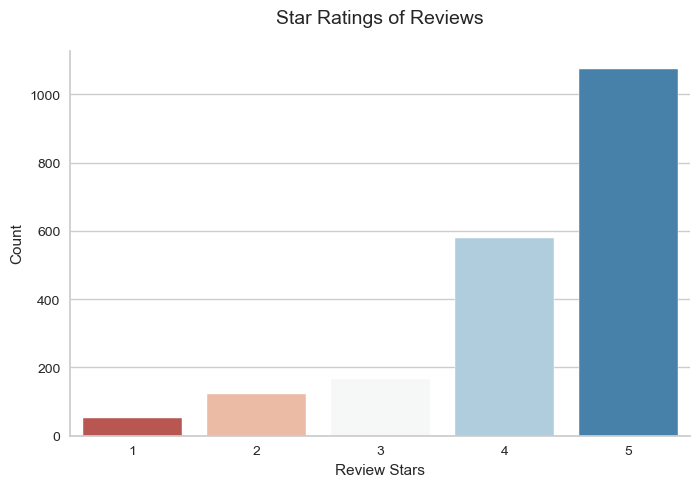

In [30]:
# setup the figure
fig, ax = plt.subplots(figsize=(8, 5))

# Show a countplot of the reviews star ratings
sns.countplot(x=tr_sentiment['bert_rating'], palette='RdBu')
sns.set_style('whitegrid')

# remove top and right spines
sns.despine(top=True, right=True)

# labels
ax.set_ylabel('Count')
ax.set_xlabel('Review Stars')

# show the title
plt.title('Star Ratings of Reviews', size=14, y=1.05)

# show the chart
plt.show()

> 83.90% of reviews were rated positively (4 or 5 stars). 

### SiEBERT Model Labels

In [24]:
# show the value counts for each star rating
tr_sentiment_siebert = tr_sentiment['siebert_label'].value_counts().reset_index()

# calculate percentage of total values for each rating
tr_sentiment_siebert['percentage'] = \
round((tr_sentiment_siebert['siebert_label']/(tr_sentiment_siebert['siebert_label'].sum())*100), 2)

# rename columns
tr_sentiment_siebert.rename(columns = {'siebert_label':'count', 'index':'siebert_label'}, inplace = True)

# show dataframe
tr_sentiment_siebert

siebert_label  count  percentage
0      POSITIVE   1729       86.67
1      NEGATIVE    266       13.33

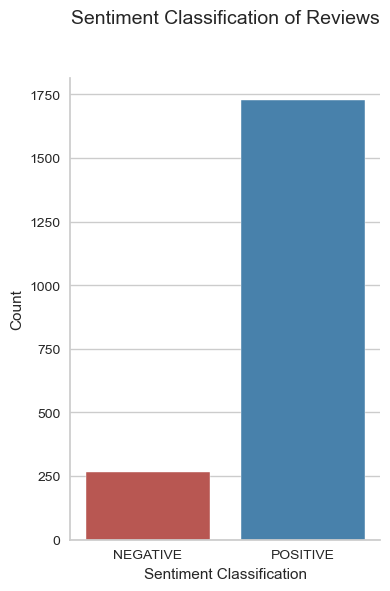

In [34]:
# setup the figure
fig, ax = plt.subplots(figsize=(4, 6))

# Show a countplot of the reviews star ratings
sns.countplot(x=tr_sentiment['siebert_label'], palette={'NEGATIVE':'#c94741', \
                     'POSITIVE':'#3783bb'})

# remove top and right spines
sns.despine(top=True, right=True)

# labels
ax.set_ylabel('Count')
ax.set_xlabel('Sentiment Classification')

# show the title
plt.title('Sentiment Classification of Reviews', size=14, y=1.1)

# show the chart
plt.show()

> 86.67% of reviews were rated positively. 

<div class="alert alert-block alert-info">
<b>NOTE:</b> There is not much difference between NLP Town BERT Model and the SiEBERT Model. From this point, the NLP Town BERT Model will be used, the main reason is that with ratings between 1 and 5 it does offer a good balance for interpretation and it's easy to understand for users. 
</div>

### VADER Sentiment Compound vs. BERT Star Ratings

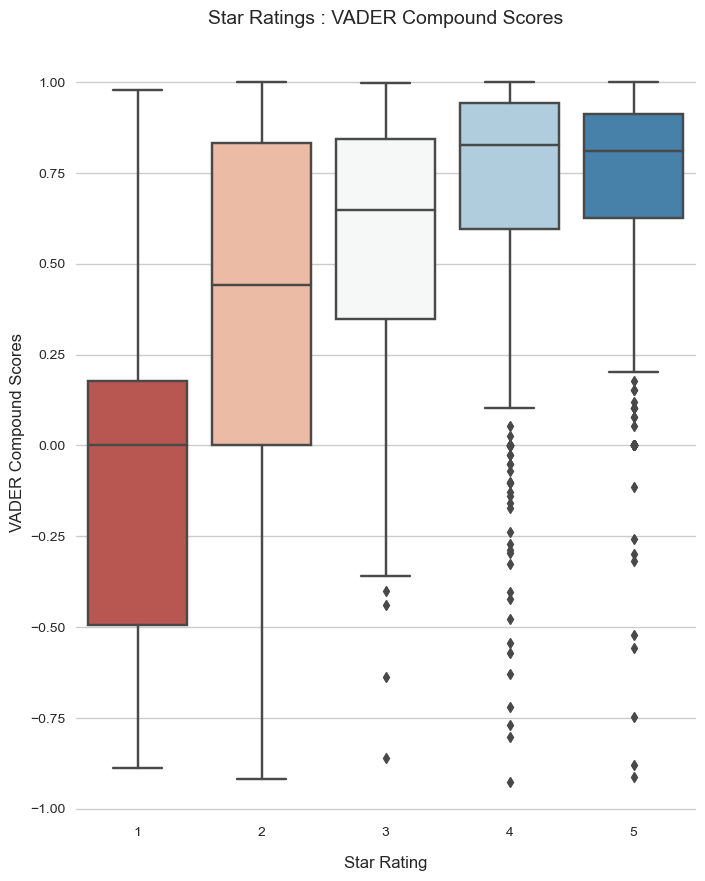

In [36]:
# setup the figure
fig, ax = plt.subplots(figsize=(8, 10))

# plot the chart
sns.boxplot(data=tr_sentiment, x='bert_rating', y='vader_compound', palette='RdBu')

# spines, label the axis
ax.set_xlabel(r'Star Rating', size=12)
ax.set_ylabel(r'VADER Compound Scores', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)

# adjust x-axis label position 
ax.xaxis.set_label_coords(.5, -.05)

# show the title
plt.title('Star Ratings : VADER Compound Scores', size=14, y=1.02)

# show plot
plt.show()

# export chart
# fig.savefig('covid-boxplot.png', dpi=300, bbox_inches='tight')

- There are many reviews given a negative score by VADER, where the BERT star ratings are posibie (4 or 5).
- Star ratings of 2 are mostly classifed as positive by VADER.
- The average VADER score for reviews with star rating of 1 is around 0.

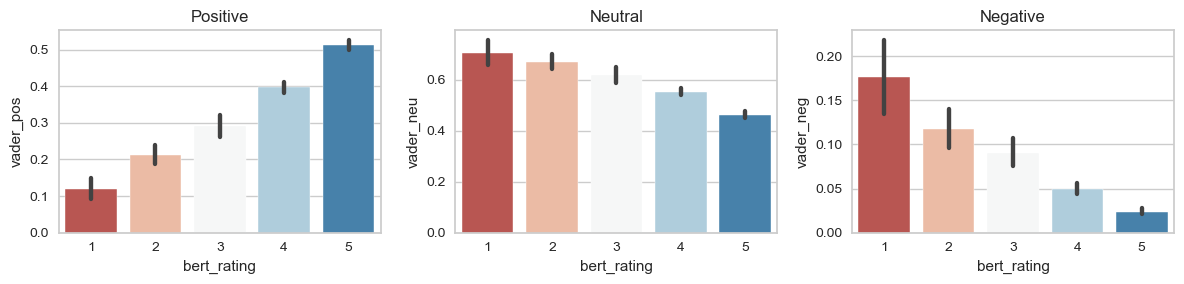

In [38]:
# setup the figure
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# bar charts to see if vader scores agree with the star rating
sns.barplot(data=tr_sentiment, x='bert_rating', y='vader_pos', ax=axs[0], palette='RdBu')
sns.barplot(data=tr_sentiment, x='bert_rating', y='vader_neu', ax=axs[1], palette='RdBu')
sns.barplot(data=tr_sentiment, x='bert_rating', y='vader_neg', ax=axs[2], palette='RdBu')

# labels
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

# show plot
plt.tight_layout()
plt.show()

- vader_pos : as expected most agree with the BERT star ratings 4 and 5, however positive scores for star ratings of 1 and 2.
- vader_neu : higher neutral ratings for low star ratings.
- vader_neg : quite low scores, which suggests the model is not confident in predicting negative sentiment.

### TextBlob Polarity Scores vs. BERT Star Ratings

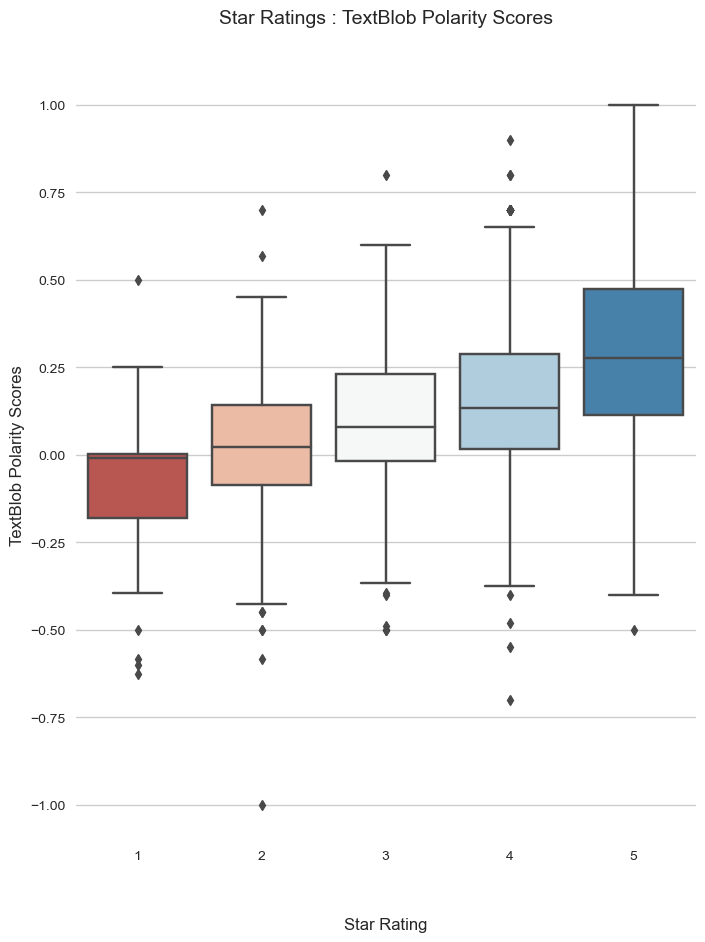

In [40]:
# setup the figure
fig, ax = plt.subplots(figsize=(8, 10))

# plot the chart
sns.boxplot(data=tr_sentiment, x='bert_rating', y='textblob_polarity', palette='RdBu')

# spines, labels and title
ax.set_xlabel(r'Star Rating', size=12)
ax.set_ylabel(r'TextBlob Polarity Scores', size=12)
plt.title('Star Ratings : TextBlob Polarity Scores', size=14, y=1.05)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)

# adjust x-axis label position 
ax.xaxis.set_label_coords(.5, -.1)

# show the plot
plt.show()

- Reviews with 1 star rating mostly have a negative TextBlob polarity score.
- Reviews with 2 star rating have a positive TextBlob polarity mean score.
- The trend looks good (positive from 1 to 5 stars), showing that the sentiment scores from both models are mostly in agreement.

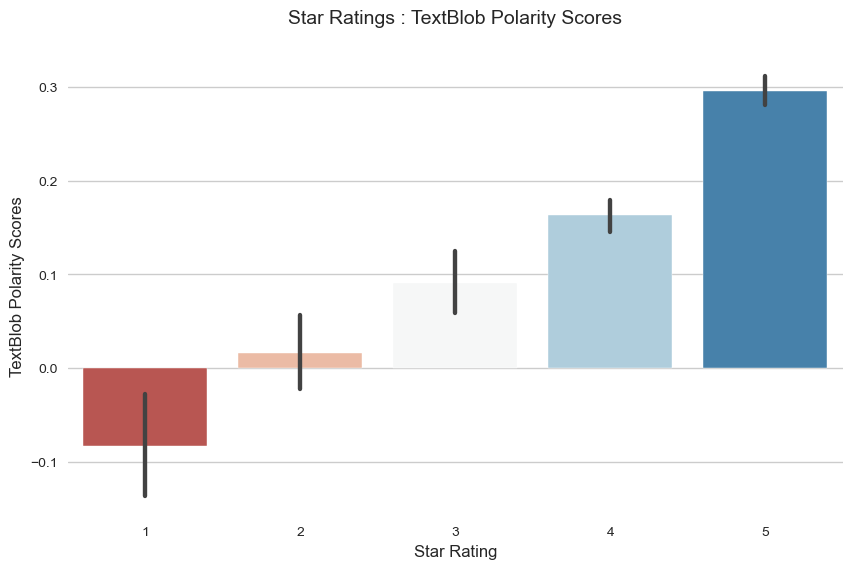

In [45]:
# bar chart to see if textblob polarity agree with the star rating
# setup the figure
fig, ax = plt.subplots(figsize=(10, 6))

# plot the chart
ax = sns.barplot(data=tr_sentiment, x='bert_rating', y='textblob_polarity', palette='RdBu')

# title
plt.title('Star Ratings : TextBlob Polarity Scores', size=14, y=1.05)
ax.set_xlabel(r'Star Rating', size=12)
ax.set_ylabel(r'TextBlob Polarity Scores', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)

# show the chart
plt.show()

- As a comparison, the TextBlob does a better job of agreeing with the star ratings than VADER.
- According to TextBlob, star ratings 2 still have positive sentiment on average.

### Using Data Filters to Find Disagreements Between Models

In [46]:
# change max column length so that I can read the review
pd.options.display.max_colwidth = 500

In [47]:
# Find reviews with positive label, 5 star rating and negative VADER compound
tr_sentiment[['review', 'vader_compound']][(tr_sentiment['siebert_label'] == 'POSITIVE') & \
             (tr_sentiment['bert_rating'] == 5) & \
             (tr_sentiment['vader_compound'] < 0)]

review  \
212                                                                                                                                                                                                                                                                                                                                                                                                                                                          Who doesn't love puppies. Great instructions, pictures. Fun.   
384   So I work as a mental health clinician in a locked facility with adolescents who have some anger issues due to experiencing ALOT of trauma. They also have to deal with really really stupid rules, which triggers both them and myself. I'd say they are at ages 6-12, when it comes to controlling anger. With that said, this game was a lot of fun during session and in anger reduction group. It's just like UNO with some anger control techniques and talking points thrown in! I love it and am extreme...   
400                                                                                                                                                                                                                                                                                                                                                                                                                                                It's really helping my ADD'R learn to discuss his anger constructively   
411                                                                                                                                                                                                                                                                                                                                                                                                                             I really like this game, it helps kids recognize anger and talk about difficult emotions.   
431                                                                                          I'm a mental health clinician who works in schools. This game is played just like uno and my children love the game. I usually have then read the question and we both answer the questions. I usually go first to give the kids an idea of how to answer just in case they are stumped. This game prepares the child to know how to defeat anger and to lets them know that they are essentially in control of their anger.   
464                                                                       I am a licensed clinical social worker and use this game a lot in therapy with kids who have difficulty managing their anger. The game is straightforward and assists in starting the conversation of how to handle anger, or to strengthen skills. I recommend this game for any child struggling to manage emotions appropriately. It uses language so that therapists, teachers or parents can all utilize it with children. Love this game!   
1148  I DIG THIS! It's a shame that 5-6 years ago I wasn't running any RPGs. I probably would have had these tiles already. This set is very versatile and will really enhance my battle mats for my players. I'm glad they are still reasonably priced and I'll be getting the other 2 master sets I've found here on Amazon. The box they come in are even wilderness tiled so you can potentially have multi-leveled terrain. It also cuts down a bit on setting up a random or story encounter. I will usuallydraw...   
1436                                                                                                                                                                                                                                                                                                                                                                                                                                    Eve

> The reviews above are clearly positive and have been misclassified by VADER.

In [48]:
# Find reviews with negative label, 1 star rating and positive VADER compound
tr_sentiment[['review', 'vader_compound']][(tr_sentiment['siebert_label'] == 'NEGATIVE') & \
             (tr_sentiment['bert_rating'] == 1) & \
             (tr_sentiment['vader_compound'] > 0)]

review  \
13                                                                                                                This is one of the worst games I have ever played. You basically have to come up with puns on the spot. Not only are puns generally pretty bad, you have to generate puns that are worse than your run of the mill groaners. I can't imagine many people enjoying it, but it is slow paced and generally does not generate any level of enjoyment unless you're very skilled with the English language.   
63                                                                                                                                                                       total waste of money. the stickers do not stick down even once it is just a tiny amount of stickers which do not work, and that is basically it. I thought the backgrounds would make this special but it just is tiny and does not work. much better to simply buy packs of stickers and use paper the activity books in this series are better   
66    The book is just stickers, it is NOT an activity book. Each sheet of sticker consist of the many pieces to create one robot and there are about four or five robots. So you could create one or multiple robots from the many sticker pieces in this book. There is only one page that doesn't have any stickers and if you are trying to make a robot from the stickers in the books you can only fit one robot in that page. We thought the small size would be great for their little hands, but If you buy t...   
145                                                                                                                                                                                                       This is a poorly put together piece of junk. We try to purchase toys that are simple and built with materials that will last. We loved this toy as kids. Sadly the pegs fall right through and the ends of the block are wobbly so we can't use it. Return shipping was more than it was worth to send it back.   
183                                                                                                                                                                                                                                                                                                                                                                  Incomplete set. Was missing the bead eyes the felt and a couple other things i was excited but was highly dissappointed that i was unable to do them   
188                                                                                                                                                                                                                                                              Do not buy! They look cute. But my daughters could not do this on their own. It took a couple of adults reading the directions (multiple times) do be able to put only 1/2 of one together. It took so long that even I was over it. Ridiculous product!   
221                                                                                                                                                                                                                                                                                                                                                                                             This is a Joke! My daughter 9 & 18 did this together, it took them over 2 hrs. and it looked NOTHING like it should have!   
322   I am completely shocked by all of the positive reviews. This kit is truly ridiculous. I recently purchased the 4M Fairyland Dollies kit which was awesome and the fairies came out adorable. I thought this would be similar but it was a joke. I had no problem making the pom-poms but once you get into having to cut the pom-poms to shape them into dogs it becomes pretty much impossible and the mess is out of control. If yo

> The reviews above are negative and have been wrongly classified by VADER.

In [49]:
# Find reviews with positive label, 5 star rating and negative TextBlob polarity score
tr_sentiment[['review', 'textblob_polarity']][(tr_sentiment['siebert_label'] == 'POSITIVE') & \
             (tr_sentiment['bert_rating'] == 5) & \
             (tr_sentiment['textblob_polarity'] < 0)]

review  \
15                                                                                                                                                                                                                                                                                                                                                                                                                     Very fun game for my family   
92                                                                                                                                                                                                       This little book is so cute! My kids love it. The cover of the book is a slick surface so you can peel the stickers off and start over again. The inside of the back cover has a robot base you can use to build off of if you so choose.   
117                                                                                                                                                                                                                                                                                                                                   I bought this as a Christmas gift for my grandson. Its a sticker book. So how can I go wrong with this gift.   
367   This is a great game for talking about anger and having fun at the same time. My son, who is 5, gets angry very easily and usually does not want to talk about it. When playing this game, he was more than willing to talk about his anger and ways to help control it. He loves playing this game! There was actually improvement in his self control after the first day that we played it. I was pleasantly surprised. Much recommended!   
368                                                                                                        This game is really simple yet surprisingly effective in helping kids learn basic anger control strategies. I use it with 8- and 9-year-olds, and they do seem to retain and use the anger control techniques it teaches. It's an inexpensive way to help kids manage their impulses and get at least some control over their emotions.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                            ...   
1959                                                                                                                                                                                                                      We love playing this game, whether there are just two of us or a group. This is my replacement set in case my original deck gets too dirty from constant use. Add in the Quiddler dictionary and there you go...a party!   
1962                                                                                                      I love playing this game with friends. I recently introduced this game to my 60+ year old parents (who never play games) when I was visiting them, and it was a hit! I ended up giving them my copy and ordered a replacement for myself when I returned home. The game is easy for new players to learn after a couple rounds, and fun.   
1963                                                                                                                                                                                                                                                                                                                                                                                                                      This is such a fun game!   
1987                                            

> 103 rows where TextBlob disagreed with the BERT models. Most of the reviews above are positive.

In [50]:
# Find reviews with negative label, 1 star rating and positive TextBlob polarity score
tr_sentiment[['review', 'textblob_polarity']][(tr_sentiment['siebert_label'] == 'NEGATIVE') & \
             (tr_sentiment['bert_rating'] == 1) & \
             (tr_sentiment['textblob_polarity'] > 0)]

review  \
63                                                                                                                                                                       total waste of money. the stickers do not stick down even once it is just a tiny amount of stickers which do not work, and that is basically it. I thought the backgrounds would make this special but it just is tiny and does not work. much better to simply buy packs of stickers and use paper the activity books in this series are better   
66    The book is just stickers, it is NOT an activity book. Each sheet of sticker consist of the many pieces to create one robot and there are about four or five robots. So you could create one or multiple robots from the many sticker pieces in this book. There is only one page that doesn't have any stickers and if you are trying to make a robot from the stickers in the books you can only fit one robot in that page. We thought the small size would be great for their little hands, but If you buy t...   
145                                                                                                                                                                                                       This is a poorly put together piece of junk. We try to purchase toys that are simple and built with materials that will last. We loved this toy as kids. Sadly the pegs fall right through and the ends of the block are wobbly so we can't use it. Return shipping was more than it was worth to send it back.   
188                                                                                                                                                                                                                                                              Do not buy! They look cute. But my daughters could not do this on their own. It took a couple of adults reading the directions (multiple times) do be able to put only 1/2 of one together. It took so long that even I was over it. Ridiculous product!   
325                                                                                                                                                                                                                                                                                                        This was a huge disappointment! There was only enough material to make 4 dogs. The Pom Pom maker was a joke. We loved the Pom Pom critters kit way better and that one supplied you with a lot of accessories.   
784                                                                                                                                                                                                                                                                                                                                                                                                                                                          CHEAP GAME. Flimsy. Get an old version and spend more money.   
874   This is a horrible edition of an awesome game. You will have more fun buying one of the original bookshelf versions, as the design of this game is an injustice to it's storied history. Why Hasbro doesn't actually produce a quality version with a separated game board, I will never understand. The original, and the 1999 versions are extremely durable and playable. The only redeeming quality of this version is the stock certificates, which are finally made of durable laminated paper. Hasbro cou...   
1552                                                                                                                                                                                                                                                                                                This says it is 5 SHEETS when in fact it is 5 strips of paper. Definately NOT worth the money. The stickers were hard for the child to 

> The reviews above are negative and have been wrongly classified by TextBlob, although most of the values are not extremely negative.

### Top 20 Positive Reviews

Find the rows where all models are in agreement that the review is positive, and sort by the siebert_score (confidence level).

In [51]:
# find the reviews
tr_sentiment[['review', 'siebert_score']][(tr_sentiment['siebert_label'] == 'POSITIVE') & \
             (tr_sentiment['bert_rating'] == 5) & \
             (tr_sentiment['vader_compound'] > 0.75) & \
             (tr_sentiment['textblob_polarity'] > 0.75)].sort_values(by='siebert_score', ascending=False)[:20]

review  \
36                                                                                                                                                                                                                                                                                                                                                                                  The pictures are great , I've done one and gave it to a friend of mine who likes dragons.   
1153                                                                                                                                                                                                                                                                                                                                                                                                                               Great product for my 5th edition adventure   
1931                                                                                                                                                                                                                                                                                                                                                                                                          we play quiddler all the time at our home and the book is great   
1866                                                                                                                                                                                                                                                                                                                   I bought this as a family gift for Christmas. We've played it a couple times; it's great for my kids to create words and then add up their own points.   
1720                                                                                                                                                                                                                                                                                                                                                                                                    It is the best thing to play with and also mind -blowing in some ways   
1719                                                                                                                                                                                                                                                                                                                                                                                                                                             Great toy for puzzle lovers!   
1705                                                                                                                                                                                                                                                                                                                                                                                                                          A great creation tool. It helps me concentrate.   
1657                                                                                                                                                                                                                                                                                                                                                                                                                 These were perfect for Joey and the price was very good.   
1609                                                                                                                                                                                                                                                                          

### Top 20 Negative Reviews

Find the rows where all models are in agreement that the review is negative, and sort by the siebert_score (confidence level).

In [52]:
tr_sentiment[['review', 'siebert_score']][(tr_sentiment['siebert_label'] == 'NEGATIVE') & \
             (tr_sentiment['bert_rating'] == 1) & \
             (tr_sentiment['vader_compound'] < 0) & \
             (tr_sentiment['textblob_polarity'] < 0.01)].sort_values(by='siebert_score', ascending=False)[:20]

review  \
4                                                                                                                                                                                                                                                                                                                                                                     As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.   
406                                                                                                                                                                                                                                                                                                                                                                                                                                                                 This game is extremely boring and takes far too long.   
1123                                                                                                                                                                             The product description specifies that this product "contains 50 miniatures" BUT THIS IS FALSE.--The package actually only contains FIVE miniatures. VERY DISAPPOINTING, especially considering a COMPLETE STARTER GAME SET-UP costs less than $25 including postage on Amazon (and this 5-piece booster cost me $13 including postage).   
847                                                                                                                                                                                                                                                              Do not waste your money on this. There are no plastic parts whatsoever. Its all cardboard and paper. the tiles slide around because they don't lock into place like the "real" versions of this game. If it wasn't a gift I would return it immediately.   
131                                                                                                                                                                                                                                                                                  This is advertised as stickers to build your own robot, what I received was the cover of the book with one sheet of stickers folded inside (not even stapled just stuck inside) and they were not even robots, they were firetrucks.   
602                                                                                                                                                                                                                                                                                                          Received defective product. I could see that the largest egg was not closed inside the box. After further inspection, its defective & won't close. Very frustrating as Im now dealing with hassle of return.   
593                                                                                                                                                                                                                 If I could give this egg zero stars I would. It is poorly made and rudiculously hard to open. What should be a tender moment spent with your children is a huge headache. I had to use a knife to open it and the knife literally broke off. That is how difficult it is. Horrible product. Dont buy.   
623                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Section 4: Add 'star_rating' to the Main Dataset

The star rating system will be a useful addition to the business. It is more accurate than the TextBlob and VADER models, and will add more nuance to the boolean classification than the SiEBERT model. Employees at Turtle Games will easily be able to interpret the rating system.

### Import Data

In [61]:
# import tr_classification and tr_sentiment
tr_classification_sentiment = pd.read_csv('tr_classification.csv')
tr_sentiment = pd.read_csv('tr_sentiment.csv')

In [63]:
# create new column in tr_classification_sentiment dataframe to store the star rating values
tr_classification_sentiment['star_rating'] = tr_sentiment['bert_rating']

In [65]:
# check the make sure it has been added
tr_classification_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   int64  
 3   spending_score  2000 non-null   int64  
 4   cluster         2000 non-null   int64  
 5   classification  2000 non-null   object 
 6   loyalty_points  2000 non-null   int64  
 7   education       2000 non-null   object 
 8   product_id      2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
 11  star_rating     1996 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 187.6+ KB


- Notice 4 Null values in the star_rating column.

### Fill NaN Values with Neutral Rating (3)

In [66]:
# creating boolean series True for NaN values
boolean_series = pd.isnull(tr_classification_sentiment["star_rating"])

# displaying data only with star_rating = NaN
tr_classification_sentiment[boolean_series]

gender  age  remuneration  spending_score  cluster  \
1121  Female   38         54940              40        4   
1258  Female   29         37720              51        4   
1328    Male   58         58220              11        0   
1781  Female   34         20500              73        1   

                                  classification  loyalty_points  \
1121  medium spending_score, medium remuneration            1536   
1258  medium spending_score, medium remuneration            1175   
1328       low spending_score, high remuneration             463   
1781       high spending_score, low remuneration             996   

          education  product_id  \
1121       Graduate       10196   
1258       Graduate        1577   
1328  Post-Graduate        7381   
1781          Basic        1459   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   review  \
1121  Disclaimer: Bought this from a local store. Paid list value, but supporting local game stores helps keep them in business, and it's a rough market to keep a gaming store running. Also, I do not own, nor have I played&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Dungeons-Dragons-Castle-Ravenloft-Board-Game/dp/0786955570/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Dungeons & Dragons: Castle Ravenloft Board Game</a>, the first D&D Adventures Board Game. Regardless...\n\nDungeons & ...   
1258  Three stars or five? Depends. This your first tile set?\n\nFirst thing, for those who might've missed it -- check Lance's customer images in the upper-left corner of the product page to get a sense of what this box contains. I started to type in a list, only to find he's got it covered (and pictures beat a list any day).\n\n3 stars: I've owned tile sets since forever, I buy a set or two each year maybe, and... I got this thing as a gift. It's okay, it's mediocre. Three stars. You won't find ...   
1328  This is the expansion for Lords of Watedeepr&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Lords-of-Waterdeep-A-Dungeons-Dragons-Board-Game/dp/0786959916/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Lords of Waterdeep: A Dungeons & Dragons Board Game</a>&nbsp;and is NOT a stand alone game.\n\nThis expansion is actually two separate expansions (Skullport and Undermountain) boxed into one. It adds in a 6th player option for the core by adding in the Gray Hands faction (with all nece...   
1781  I recently got two of these balls for my cousins for Christmas. They're 8 and 11 years old and I was excited to see them tinkering with what seemed like a "brain" toy.\n\nThe ball is well constructed and provides a fair deal of entertainment as you mess around with how the pieces fit together. The packaging includes a nice booklet about the ball and certain shapes one can make. Unfortunately I found these 2D pictures to be next to useless. What's more is that every shape they showed was very...   

                                                                                             summary  \
1121  Wrath of Ashardalon: great investment for an avid RPG fan who enjoys tabletop as well as CRPGs   
1258                       Not interesting or inspiring. But maybe that's okay? It covers the basics   
1328                                     Almost never play Lords of Waterdeep without this expansion   
1781                         Only worthwhile for very young children; otherwise, go for real magnets   

      star_rating  
1121          NaN  
1258          NaN  
1328          NaN  
1781          NaN

In [67]:
# fill all missing values with value 0 (neutral rating)
tr_classification_sentiment = tr_classification_sentiment.fillna(3)

In [68]:
# converting star_rating from float to int
tr_classification_sentiment['star_rating'] = tr_classification_sentiment['star_rating'].astype(int)

In [69]:
tr_classification_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          2000 non-null   object
 1   age             2000 non-null   int64 
 2   remuneration    2000 non-null   int64 
 3   spending_score  2000 non-null   int64 
 4   cluster         2000 non-null   int64 
 5   classification  2000 non-null   object
 6   loyalty_points  2000 non-null   int64 
 7   education       2000 non-null   object
 8   product_id      2000 non-null   int64 
 9   review          2000 non-null   object
 10  summary         2000 non-null   object
 11  star_rating     2000 non-null   int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 179.8+ KB


In [70]:
# export tr_classification_sentiment to csv file
tr_classification_sentiment.to_csv('tr_classification_sentiment.csv', index=False)

### Find Negative Reviews by Customer Group Classfication 

#### low spending_score, high remuneration

In [71]:
tr_lss_hr = tr_classification_sentiment[['classification','summary', 'star_rating']] \
              [(tr_classification_sentiment['classification'] == 'low spending_score, high remuneration') & \
              (tr_classification_sentiment['star_rating'] < 3)].sort_values(by='star_rating', ascending=True)

tr_lss_hr

classification  \
174   low spending_score, high remuneration   
182   low spending_score, high remuneration   
188   low spending_score, high remuneration   
784   low spending_score, high remuneration   
328   low spending_score, high remuneration   
770   low spending_score, high remuneration   
134   low spending_score, high remuneration   
1502  low spending_score, high remuneration   
1164  low spending_score, high remuneration   
998   low spending_score, high remuneration   
996   low spending_score, high remuneration   
788   low spending_score, high remuneration   
750   low spending_score, high remuneration   
574   low spending_score, high remuneration   
538   low spending_score, high remuneration   
540   low spending_score, high remuneration   
1524  low spending_score, high remuneration   
352   low spending_score, high remuneration   
196   low spending_score, high remuneration   
178   low spending_score, high remuneration   
176   low spending_score, high remuneration   
148   low spending_score, high remuneration   
144   low spending_score, high remuneration   
136   low spending_score, high remuneration   
572   low spending_score, high remuneration   
1549  low spending_score, high remuneration   

                                                      summary  star_rating  
174                                            Faulty Product            1  
182                                           INCOMPLETE KIT!            1  
188                    Do not buy! They look cute. But my ...            1  
784                                                  One Star            1  
328                                        Defective- poor QC            1  
770                           Bring back the 1999 Version!!!!            1  
134                                   Perfect for Preschooler            2  
1502                  Too complicated, even for an adult!  :(            2  
1164                     Store them in a different container.            2  
998                                                Four Stars            2  
996   We had hours of fun. Took a bit to figure out the rules            2  
788             Great game, but lazy and boring board design.            2  
750                                                 Two Stars            2  
574                 Smaller Than Expected for Twice the Price            2  
538                                                  Hmmm????            2  
540             Meh ... It wasn't very useful. I returned it.            2  
1524                                                Two Stars            2  
352                   So Excited to Try, Difficult to Execute            2  
196                                           Did not like it            2  
178        At age 31 I found these very difficult to make ...            2  
176                                but nothing like the photo            2  
148               My five year old grandson, my wife, and ...            2  
144                                              Disappointed            2  
136                          Should be free with purchase....            2  
572                                                  One Star            2  
1549                                         rips too easily.            2

#### high spending_score, high remuneration

In [72]:
tr_hss_hr = tr_classification_sentiment[['classification','summary', 'star_rating']] \
              [((tr_classification_sentiment['classification'] == 'low spending_score, high remuneration') | \
               (tr_classification_sentiment['classification'] == 'high spending_score, high remuneration')) & \
               (tr_classification_sentiment['star_rating'] < 3)].sort_values(by='star_rating', ascending=True)

tr_hss_hr

classification  \
131   high spending_score, high remuneration   
1670  high spending_score, high remuneration   
1552  high spending_score, high remuneration   
1123  high spending_score, high remuneration   
929   high spending_score, high remuneration   
784    low spending_score, high remuneration   
770    low spending_score, high remuneration   
593   high spending_score, high remuneration   
1694  high spending_score, high remuneration   
359   high spending_score, high remuneration   
337   high spending_score, high remuneration   
328    low spending_score, high remuneration   
325   high spending_score, high remuneration   
188    low spending_score, high remuneration   
183   high spending_score, high remuneration   
1706  high spending_score, high remuneration   
145   high spending_score, high remuneration   
173   high spending_score, high remuneration   
174    low spending_score, high remuneration   
182    low spending_score, high remuneration   
133   high spending_score, high remuneration   
134    low spending_score, high remuneration   
793   high spending_score, high remuneration   
799   high spending_score, high remuneration   
143   high spending_score, high remuneration   
983   high spending_score, high remuneration   
996    low spending_score, high remuneration   
998    low spending_score, high remuneration   
136    low spending_score, high remuneration   
1127  high spending_score, high remuneration   
1164   low spending_score, high remuneration   
788    low spending_score, high remuneration   
1517  high spending_score, high remuneration   
1524   low spending_score, high remuneration   
1674  high spending_score, high remuneration   
1549   low spending_score, high remuneration   
1554  high spending_score, high remuneration   
1502   low spending_score, high remuneration   
179   high spending_score, high remuneration   
751   high spending_score, high remuneration   
178    low spending_score, high remuneration   
193   high spending_score, high remuneration   
196    low spending_score, high remuneration   
197   high spending_score, high remuneration   
176    low spending_score, high remuneration   
347   high spending_score, high remuneration   
352    low spending_score, high remuneration   
159   high spending_score, high remuneration   
363   high spending_score, high remuneration   
538    low spending_score, high remuneration   
148    low spending_score, high remuneration   
551   high spending_score, high remuneration   
572    low spending_score, high remuneration   
574    low spending_score, high remuneration   
147   high spending_score, high remuneration   
595   high spending_score, high remuneration   
750    low spending_score, high remuneration   
144    low spending_score, high remuneration   
540    low spending_score, high remuneration   

                                                                               summary  \
131                                                                  Not as advertised   
1670                                                                   Not as expected   
1552                                      This says it is 5 SHEETS when in fact it ...   
1123                                                                  Not as described   
929                                                              Wrath of the customer   
784                                                                           One Star   
770                                                    Bring back the 1999 Version!!!!   
593                                            Too hard for children or adults to open   
1694                                                     No ball to the Ball of Whacks   
359                                                               Not worth the money!   
337                                                   Don't try to recreate the photos   
328                                                                 D

### Visualise Review Sentiment by Customer Group Classfication 

In [74]:
# Change dtype of classification to be ordered categories in order of importance to marketing
tr_classification_sentiment['classification'] = tr_classification_sentiment['classification']. \
       astype(pd.api.types.CategoricalDtype(categories=['high spending_score, high remuneration',
                                                        'low spending_score, high remuneration',
                                                        'medium spending_score, medium remuneration',
                                                        'high spending_score, low remuneration',
                                                        'low spending_score, low remuneration'], ordered=True))

In [75]:
# set classification colours (in order as above)
colours = ['#e32f27', 'orange', 'steelblue', '#cccccc', '#666666']

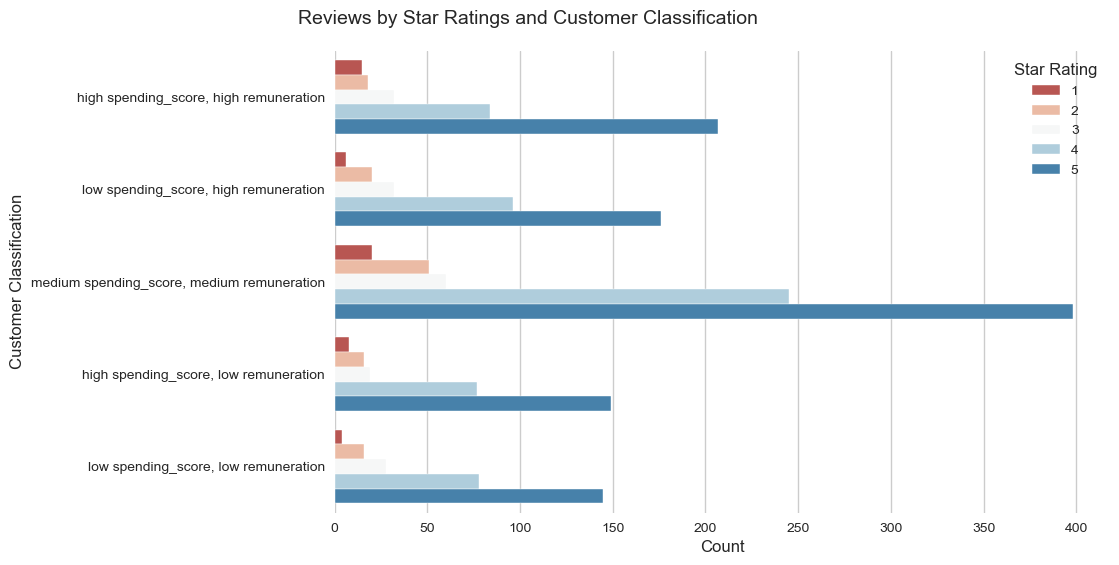

In [93]:
# setup the figure
fig, ax = plt.subplots(figsize=(10, 6))

# plot the chart
ax = sns.countplot(data=tr_classification_sentiment, y='classification', hue='star_rating', palette='RdBu')

# setup labels, ticks, spines, legend and title
ax.set_ylabel(r'Customer Classification', size=12)
ax.set_xlabel(r'Count', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Reviews by Star Ratings and Customer Classification', size=14, y=1.04, x=0.25)
plt.legend(title='Star Rating')

# show the plot
plt.show()

- Based on the sentiment analysis, the vast majority of products are rated positively across all the customer classification groups.

In [104]:
# group the classifications by star rating return count
group_classification_star_rating = tr_classification_sentiment.groupby(['classification','star_rating']).size().reset_index()

# rename column
group_classification_star_rating.rename(columns = {0 : 'count'}, inplace = True)

# calculate percentage of total values for each classification
group_classification_star_rating['percentage'] = \
round((group_classification_star_rating['count']/(group_classification_star_rating['count'].sum())*100), 2)

# show dataframe
group_classification_star_rating

classification  star_rating  count  percentage
0       high spending_score, high remuneration            1     15        0.75
1       high spending_score, high remuneration            2     18        0.90
2       high spending_score, high remuneration            3     32        1.60
3       high spending_score, high remuneration            4     84        4.20
4       high spending_score, high remuneration            5    207       10.35
5        low spending_score, high remuneration            1      6        0.30
6        low spending_score, high remuneration            2     20        1.00
7        low spending_score, high remuneration            3     32        1.60
8        low spending_score, high remuneration            4     96        4.80
9        low spending_score, high remuneration            5    176        8.80
10  medium spending_score, medium remuneration            1     20        1.00
11  medium spending_score, medium remuneration            2     51        2.55
12  medium spending_score, medium remuneration            3     60        3.00
13  medium spending_score, medium remuneration            4    245       12.25
14  medium spending_score, medium remuneration            5    398       19.90
15       high spending_score, low remuneration            1      8        0.40
16       high spending_score, low remuneration            2     16        0.80
17       high spending_score, low remuneration            3     19        0.95
18       high spending_score, low remuneration            4     77        3.85
19       high spending_score, low remuneration            5    149        7.45
20        low spending_score, low remuneration            1      4        0.20
21        low spending_score, low remuneration            2     16        0.80
22        low spending_score, low remuneration            3     28        1.40
23        low spending_score, low remuneration            4     78        3.90
24        low spending_score, low remuneration            5    145        7.25

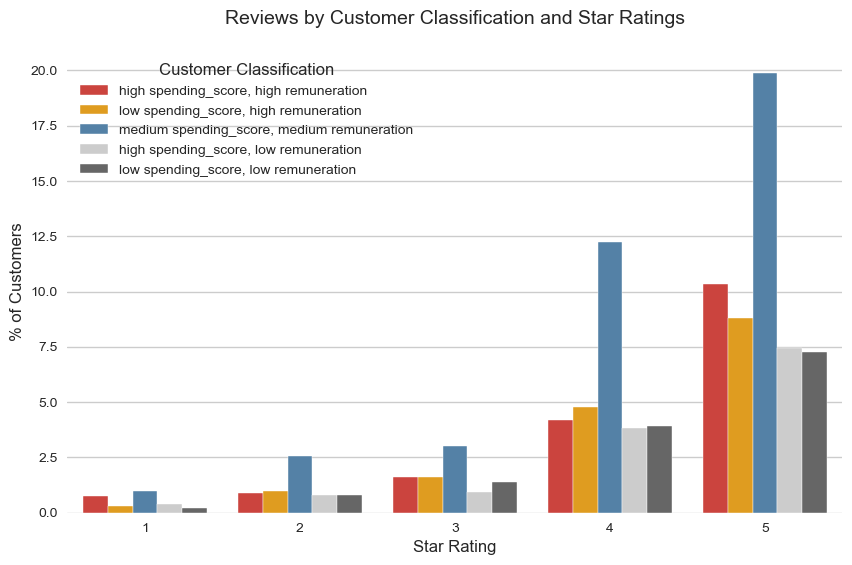

In [108]:
# setup the figure
fig, ax = plt.subplots(figsize=(10, 6))

# plot the chart
ax = sns.barplot(data=group_classification_star_rating, x='star_rating', y='percentage', hue='classification', palette=colours)

# setup labels, ticks, spines, legend and title
ax.set_xlabel(r'Star Rating', size=12)
ax.set_ylabel(r'% of Customers', size=12)
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)
plt.title('Reviews by Customer Classification and Star Ratings', size=14, y=1.04)
plt.legend(loc='best', title='Customer Classification')  


# show plot
plt.show()

These charts illustrate how we can combine sentiment analysis with target groups to be able to direct marketing resources most effeciently.

- The insights provided by this analysis can help the marketing department at Turtle Games respond to bad reviews immediately and identify products that are rated poorly.
- The star rating system for measuring customer sentiment towards the product can be easily understood and clear actions can be scripted.